In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df_kag = pd.read_csv("C:/Users/HP/Desktop/disertation topic/car_price_prediction/archive (2)/CarPrice_Assignment.csv")
df_auto = pd.read_csv("C:/Users/HP/Desktop/disertation topic/car_price_prediction/archive (2)/automobile_dataset.csv")

In [3]:
df_kag

,car_ID,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [4]:
df_kag = df_kag.drop('car_ID',axis=1)
df_kag

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [5]:
# Calculating the Missing Values % contribution in DF

df_null = df_kag.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

symboling     0.0000
engine-type   0.0000
highway-mpg   0.0000
city-mpg      0.0000
peak-rpm      0.0000
dtype: float64

In [6]:
df_kag['make'] = df_kag['make'].astype(str)

In [7]:
df_kag['make'] = df_kag['make'].str.split(' ').str[0]

In [8]:
df_kag

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [9]:
 df_kag['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
df_kag['num-of-doors'] = df_kag['num-of-doors'].replace({'two': '2', 'four': '4'})

In [11]:
df_kag

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi,gas,std,4,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi,gas,std,4,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,-1,volvo,gas,std,4,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [12]:
df_kag.dtypes

symboling            int64  
make                 object 
fuel-type            object 
aspiration           object 
num-of-doors         object 
body-style           object 
drive-wheels         object 
engine-location      object 
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          int64  
engine-type          object 
num-of-cylinders     object 
engine-size          int64  
fuel-system          object 
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           int64  
peak-rpm             int64  
city-mpg             int64  
highway-mpg          int64  
price                float64
dtype: object

In [13]:
df_auto

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,num-of-cylinders,engine-type,curb-weight,height,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0000,27,21,5000.0000,111.0000,9.0000,2.6800,3.4700,mpfi,130,4,dohc,2548,48.8000,64.1000,168.8000,88.6000,front,rwd,convertible,2.0000,std,gas,alfa-romero,NaN,3
1,16500.0000,27,21,5000.0000,111.0000,9.0000,2.6800,3.4700,mpfi,130,4,dohc,2548,48.8000,64.1000,168.8000,88.6000,front,rwd,convertible,2.0000,std,gas,alfa-romero,NaN,3
2,16500.0000,26,19,5000.0000,154.0000,9.0000,3.4700,2.6800,mpfi,152,6,ohcv,2823,52.4000,65.5000,171.2000,94.5000,front,rwd,hatchback,2.0000,std,gas,alfa-romero,NaN,1
3,13950.0000,30,24,5500.0000,102.0000,10.0000,3.4000,3.1900,mpfi,109,4,ohc,2337,54.3000,66.2000,176.6000,99.8000,front,fwd,sedan,4.0000,std,gas,audi,164.0000,2
4,17450.0000,22,18,5500.0000,115.0000,8.0000,3.4000,3.1900,mpfi,136,5,ohc,2824,54.3000,66.4000,176.6000,99.4000,front,4wd,sedan,4.0000,std,gas,audi,164.0000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0000,28,23,5400.0000,114.0000,9.5000,3.1500,3.7800,mpfi,141,4,ohc,2952,55.5000,68.9000,188.8000,109.1000,front,rwd,sedan,4.0000,std,gas,volvo,95.0000,-1
201,19045.0000,25,19,5300.0000,160.0000,8.7000,3.1500,3.7800,mpfi,141,4,ohc,3049,55.5000,68.8000,188.8000,109.1000,front,rwd,sedan,4.0000,turbo,gas,volvo,95.0000,-1
202,21485.0000,23,18,5500.0000,134.0000,8.8000,2.8700,3.5800,mpfi,173,6,ohcv,3012,55.5000,68.9000,188.8000,109.1000,front,rwd,sedan,4.0000,std,gas,volvo,95.0000,-1
203,22470.0000,27,26,4800.0000,106.0000,23.0000,3.4000,3.0100,idi,145,6,ohc,3217,55.5000,68.9000,188.8000,109.1000,front,rwd,sedan,4.0000,turbo,diesel,volvo,95.0000,-1


In [14]:
result = pd.concat([df_kag, df_auto], ignore_index=True)

In [15]:
result

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111.0000,5000.0000,21,27,13495.0000,NaN
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111.0000,5000.0000,21,27,16500.0000,NaN
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154.0000,5000.0000,19,26,16500.0000,NaN
3,2,audi,gas,std,4,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102.0000,5500.0000,24,30,13950.0000,NaN
4,2,audi,gas,std,4,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115.0000,5500.0000,18,22,17450.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-1,volvo,gas,std,4.0000,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,4,141,mpfi,3.7800,3.1500,9.5000,114.0000,5400.0000,23,28,16845.0000,95.0000
406,-1,volvo,gas,turbo,4.0000,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,4,141,mpfi,3.7800,3.1500,8.7000,160.0000,5300.0000,19,25,19045.0000,95.0000
407,-1,volvo,gas,std,4.0000,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,6,173,mpfi,3.5800,2.8700,8.8000,134.0000,5500.0000,18,23,21485.0000,95.0000
408,-1,volvo,diesel,turbo,4.0000,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,6,145,idi,3.0100,3.4000,23.0000,106.0000,4800.0000,26,27,22470.0000,95.0000


In [16]:
result.to_csv('combined_automobile_dataset.csv', index=False)

In [17]:
result['num-of-cylinders'] = result['num-of-cylinders'].replace({'six': '6', 'four': '4','five':'5','three':'3', 'twelve':'12', 'two':'2', 'eight':'8'})
result = result.apply(lambda x: x.astype(float) if x.dtype.kind in 'fi' else x)


In [18]:
result

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses
0,3.0000,alfa-romero,gas,std,2,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548.0000,dohc,4,130.0000,mpfi,3.4700,2.6800,9.0000,111.0000,5000.0000,21.0000,27.0000,13495.0000,NaN
1,3.0000,alfa-romero,gas,std,2,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548.0000,dohc,4,130.0000,mpfi,3.4700,2.6800,9.0000,111.0000,5000.0000,21.0000,27.0000,16500.0000,NaN
2,1.0000,alfa-romero,gas,std,2,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823.0000,ohcv,6,152.0000,mpfi,2.6800,3.4700,9.0000,154.0000,5000.0000,19.0000,26.0000,16500.0000,NaN
3,2.0000,audi,gas,std,4,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337.0000,ohc,4,109.0000,mpfi,3.1900,3.4000,10.0000,102.0000,5500.0000,24.0000,30.0000,13950.0000,NaN
4,2.0000,audi,gas,std,4,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824.0000,ohc,5,136.0000,mpfi,3.1900,3.4000,8.0000,115.0000,5500.0000,18.0000,22.0000,17450.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-1.0000,volvo,gas,std,4.0000,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952.0000,ohc,4,141.0000,mpfi,3.7800,3.1500,9.5000,114.0000,5400.0000,23.0000,28.0000,16845.0000,95.0000
406,-1.0000,volvo,gas,turbo,4.0000,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049.0000,ohc,4,141.0000,mpfi,3.7800,3.1500,8.7000,160.0000,5300.0000,19.0000,25.0000,19045.0000,95.0000
407,-1.0000,volvo,gas,std,4.0000,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012.0000,ohcv,6,173.0000,mpfi,3.5800,2.8700,8.8000,134.0000,5500.0000,18.0000,23.0000,21485.0000,95.0000
408,-1.0000,volvo,diesel,turbo,4.0000,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217.0000,ohc,6,145.0000,idi,3.0100,3.4000,23.0000,106.0000,4800.0000,26.0000,27.0000,22470.0000,95.0000


In [19]:
# Display summary statistics for numerical features
summary_statistics_numerical = result.describe()
print(summary_statistics_numerical)




       symboling  wheel-base   length    width   height  curb-weight  \
count 410.0000   410.0000    410.0000 410.0000 410.0000 410.0000       
mean  0.8341     98.7566     174.0493 65.9078  53.7249  2555.5659      
std   1.2438     6.0144      12.3222  2.1426   2.4405   520.0433       
min   -2.0000    86.6000     141.1000 60.3000  47.8000  1488.0000      
25%   0.0000     94.5000     166.3000 64.1000  52.0000  2145.0000      
50%   1.0000     97.0000     173.2000 65.5000  54.1000  2414.0000      
75%   2.0000     102.4000    183.1000 66.9000  55.5000  2935.0000      
max   3.0000     120.9000    208.1000 72.3000  59.8000  4066.0000      

       engine-size     bore   stroke  compression-ratio  horsepower  peak-rpm  \
count 410.0000     406.0000 406.0000 410.0000           408.0000    408.0000    
mean  126.9073     3.3298   3.2554   10.1425            104.1863    5125.2451   
std   41.5918      0.2718   0.3148   3.9672             39.5803     477.5680    
min   61.0000      2.5400  

In [20]:
# If you want to include categorical data in your summary statistics,
# you can include the 'include' parameter.
summary_statistics_all = result.describe(include='all')  # 'all' will include categorical data as well
print(summary_statistics_all)


        symboling    make fuel-type aspiration num-of-doors body-style  \
count  410.0000    410     410       410        408          410         
unique NaN         30      2         2          4            5           
top    NaN         toyota  gas       std        4            sedan       
freq   NaN         63      370       336        115          192         
mean   0.8341      NaN     NaN       NaN        NaN          NaN         
std    1.2438      NaN     NaN       NaN        NaN          NaN         
min    -2.0000     NaN     NaN       NaN        NaN          NaN         
25%    0.0000      NaN     NaN       NaN        NaN          NaN         
50%    1.0000      NaN     NaN       NaN        NaN          NaN         
75%    2.0000      NaN     NaN       NaN        NaN          NaN         
max    3.0000      NaN     NaN       NaN        NaN          NaN         

       drive-wheels engine-location  wheel-base   length    width   height  \
count   410          410         

In [21]:

# If you want to save this to a CSV, you can do that as well:
#summary_statistics_numerical.to_csv('summary_statistics_numerical.csv')
#summary_statistics_all.to_csv('summary_statistics_all.csv')

In [22]:
# Check for duplicates
print("Duplicate Entries:", result.duplicated().sum())

# Drop duplicates if necessary
#result.drop_duplicates(inplace=True)



Duplicate Entries: 0


In [23]:
# Check for missing values
print("\nMissing Values:")
missing_values = result.isnull().sum()
print(missing_values[missing_values > 0])



# Check for missing values percentage
print("\nMissing Values Percentage:")
missing_values_percent = 100 * result.isnull().mean()
print(missing_values_percent[missing_values_percent > 0])


Missing Values:
num-of-doors         2  
bore                 4  
stroke               4  
horsepower           2  
peak-rpm             2  
price                4  
normalized-losses    246
dtype: int64

Missing Values Percentage:
num-of-doors        0.4878 
bore                0.9756 
stroke              0.9756 
horsepower          0.4878 
peak-rpm            0.4878 
price               0.9756 
normalized-losses   60.0000
dtype: float64


In [24]:
# Identify columns with a single unique value
print("\nColumns with a single unique value:")
for column in result.columns:
    if result[column].nunique() == 1:
        print(column)

# Unique values and counts for categorical columns
print("\nUnique Values for Categorical Columns:")
categorical_columns = result.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    print(f"--- Column: '{column}' ---")
    print(result[column].value_counts())
    print("\n")

# Data types of each feature
print("\nData Types:")
print(result.dtypes)


Columns with a single unique value:

Unique Values for Categorical Columns:
--- Column: 'make' ---
toyota           63
nissan           35
mazda            32
honda            26
mitsubishi       26
subaru           24
volvo            22
volkswagen       21
dodge            18
bmw              16
plymouth         14
audi             14
saab             12
peugeot          11
peugot           11
porsche          9 
buick            8 
isuzu            8 
mercedes-benz    8 
jaguar           6 
chevrolet        6 
alfa-romero      6 
renault          4 
mercury          2 
maxda            2 
vw               2 
Nissan           1 
porcshce         1 
toyouta          1 
vokswagen        1 
Name: make, dtype: int64


--- Column: 'fuel-type' ---
gas       370
diesel    40 
Name: fuel-type, dtype: int64


--- Column: 'aspiration' ---
std      336
turbo    74 
Name: aspiration, dtype: int64


--- Column: 'num-of-doors' ---
4      115
4.0    114
2      90 
2.0    89 
Name: num-of-doors, dt

In [25]:
result['num-of-cylinders'].unique()

array(['4', '6', '5', '3', '12', '2', '8', 4, 6, 5, 3, 12, 2, 8],
      dtype=object)

In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          410 non-null    float64
 1   make               410 non-null    object 
 2   fuel-type          410 non-null    object 
 3   aspiration         410 non-null    object 
 4   num-of-doors       408 non-null    object 
 5   body-style         410 non-null    object 
 6   drive-wheels       410 non-null    object 
 7   engine-location    410 non-null    object 
 8   wheel-base         410 non-null    float64
 9   length             410 non-null    float64
 10  width              410 non-null    float64
 11  height             410 non-null    float64
 12  curb-weight        410 non-null    float64
 13  engine-type        410 non-null    object 
 14  num-of-cylinders   410 non-null    object 
 15  engine-size        410 non-null    float64
 16  fuel-system        410 non

In [27]:
# Replace with mean
result['price'] = result['price'].fillna(result['price'].mean())

# Replace with median
result['price'] = result['price'].fillna(result['price'].median())

# Replace with mode
result['price'] = result['price'].fillna(result['price'].mode()[0])



In [28]:
for column in ['bore', 'stroke', 'horsepower', 'peak-rpm']:
    result[column].fillna(result[column].mean(), inplace=True)

In [29]:
# shape of the data
result.shape

(410, 26)

In [30]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          410 non-null    float64
 1   make               410 non-null    object 
 2   fuel-type          410 non-null    object 
 3   aspiration         410 non-null    object 
 4   num-of-doors       408 non-null    object 
 5   body-style         410 non-null    object 
 6   drive-wheels       410 non-null    object 
 7   engine-location    410 non-null    object 
 8   wheel-base         410 non-null    float64
 9   length             410 non-null    float64
 10  width              410 non-null    float64
 11  height             410 non-null    float64
 12  curb-weight        410 non-null    float64
 13  engine-type        410 non-null    object 
 14  num-of-cylinders   410 non-null    object 
 15  engine-size        410 non-null    float64
 16  fuel-system        410 non

In [31]:
# description of the data
result.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses
count,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,410.0000,164.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1863,5125.2451,25.2195,30.7512,13242.2627,122.0000
std,1.2438,6.0144,12.3222,2.1426,2.4405,520.0433,41.5918,0.2705,0.3132,3.9672,39.4834,476.3989,6.5341,6.8780,7919.4143,35.4422
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000,65.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000,94.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10345.0000,115.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16500.0000,150.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000,256.0000


In [32]:
result.dtypes


symboling            float64
make                 object 
fuel-type            object 
aspiration           object 
num-of-doors         object 
body-style           object 
drive-wheels         object 
engine-location      object 
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type          object 
num-of-cylinders     object 
engine-size          float64
fuel-system          object 
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
normalized-losses    float64
dtype: object

In [33]:
result['num-of-doors'] = result['num-of-doors'].astype(float)
result['num-of-cylinders'] = result['num-of-cylinders'].astype(float)
result.dtypes

# Replace with mean
result['num-of-doors'] = result['num-of-doors'].fillna(result['num-of-doors'].mean())

# Replace with median
result['num-of-doors'] = result['num-of-doors'].fillna(result['num-of-doors'].median())

# Replace with mode
result['num-of-doors'] = result['num-of-doors'].fillna(result['num-of-doors'].mode()[0])


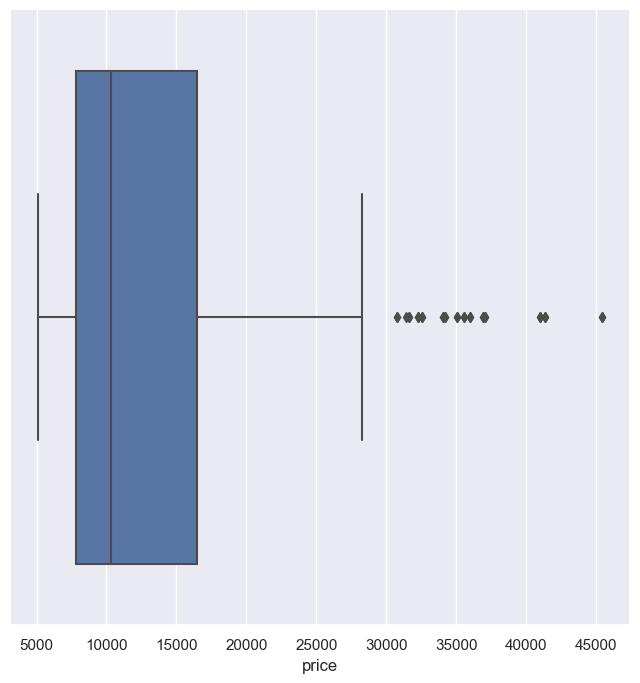

In [34]:
#Outlier Analysis of target variable with maximum amount of Inconsistency
# Assuming 'price' is your target variable
sns.boxplot(x=result['price'])
plt.show()

In [35]:
from scipy import stats

z_scores = np.abs(stats.zscore(result['price']))
outliers = np.where(z_scores > 3)
print("Outlier indices:", outliers[0])
print("Outlier values:", result['price'].iloc[outliers[0]])

Outlier indices: [ 16  73  74 128 221 278 279 333]
Outlier values: 16    41315.0000
73    40960.0000
74    45400.0000
128   37028.0000
221   41315.0000
278   40960.0000
279   45400.0000
333   37028.0000
Name: price, dtype: float64


In [36]:
# IQR (Interquartile Range) Method
Q1 = result['price'].quantile(0.25)
Q3 = result['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = result[(result['price'] < lower_bound) | (result['price'] > upper_bound)]
print("Outliers using IQR method:\n", outliers)


Outliers using IQR method:
      symboling           make fuel-type aspiration  num-of-doors   body-style  \
15  0.0000      bmw            gas       std       4.0000         sedan         
16  0.0000      bmw            gas       std       2.0000         sedan         
17  0.0000      bmw            gas       std       4.0000         sedan         
47  0.0000      jaguar         gas       std       4.0000         sedan         
48  0.0000      jaguar         gas       std       4.0000         sedan         
49  0.0000      jaguar         gas       std       2.0000         sedan         
70  -1.0000     buick          diesel    turbo     4.0000         sedan         
71  -1.0000     buick          gas       std       4.0000         sedan         
72  3.0000      buick          gas       std       2.0000         convertible   
73  0.0000      buick          gas       std       4.0000         sedan         
74  1.0000      buick          gas       std       2.0000         hardtop       


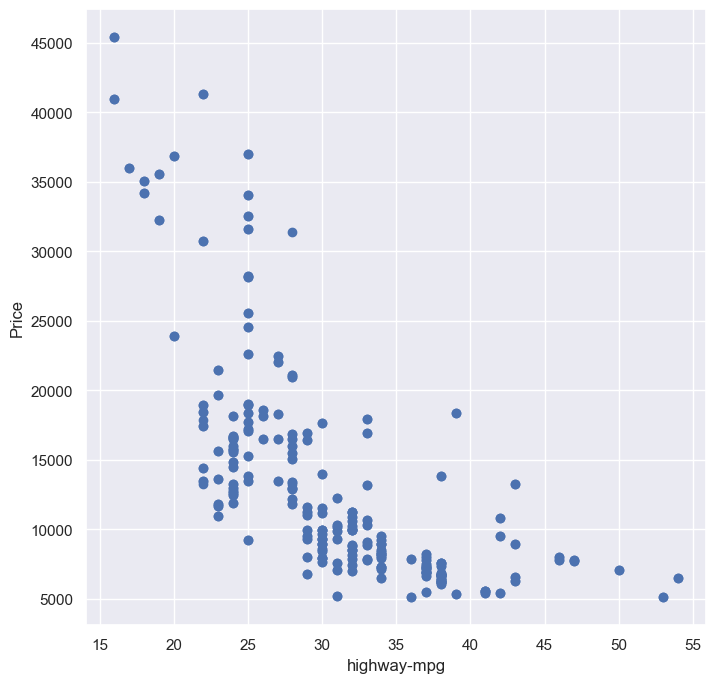

In [37]:
#Scatter Plot (if you have another numerical variable to compare with price)
plt.scatter(result['highway-mpg'], result['price']) # Replace 'mileage' with a relevant variable
plt.xlabel('highway-mpg')
plt.ylabel('Price')
plt.show()


In [38]:
#Scatter Plot (if you have another numerical variable to compare with price)
#plt.scatter(result['city-mpg'], result['price']) # Replace 'mileage' with a relevant variable
#plt.xlabel('city-mpg')
#plt.ylabel('Price')
#plt.show()

In [39]:
result['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo', 'mercedes-benz',
       'peugot'], dtype=object)

In [40]:
result['make'] = result['make'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [41]:
#result['make'].unique()

In [42]:
result['symboling'] = result['symboling'].astype(str)

In [43]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = result.select_dtypes(include=['object']).columns
num_col = result.select_dtypes(exclude=['object']).columns
result_cat = result[cat_col]
result_num = result[num_col]

Text(0, 0.5, 'Count of Cars')

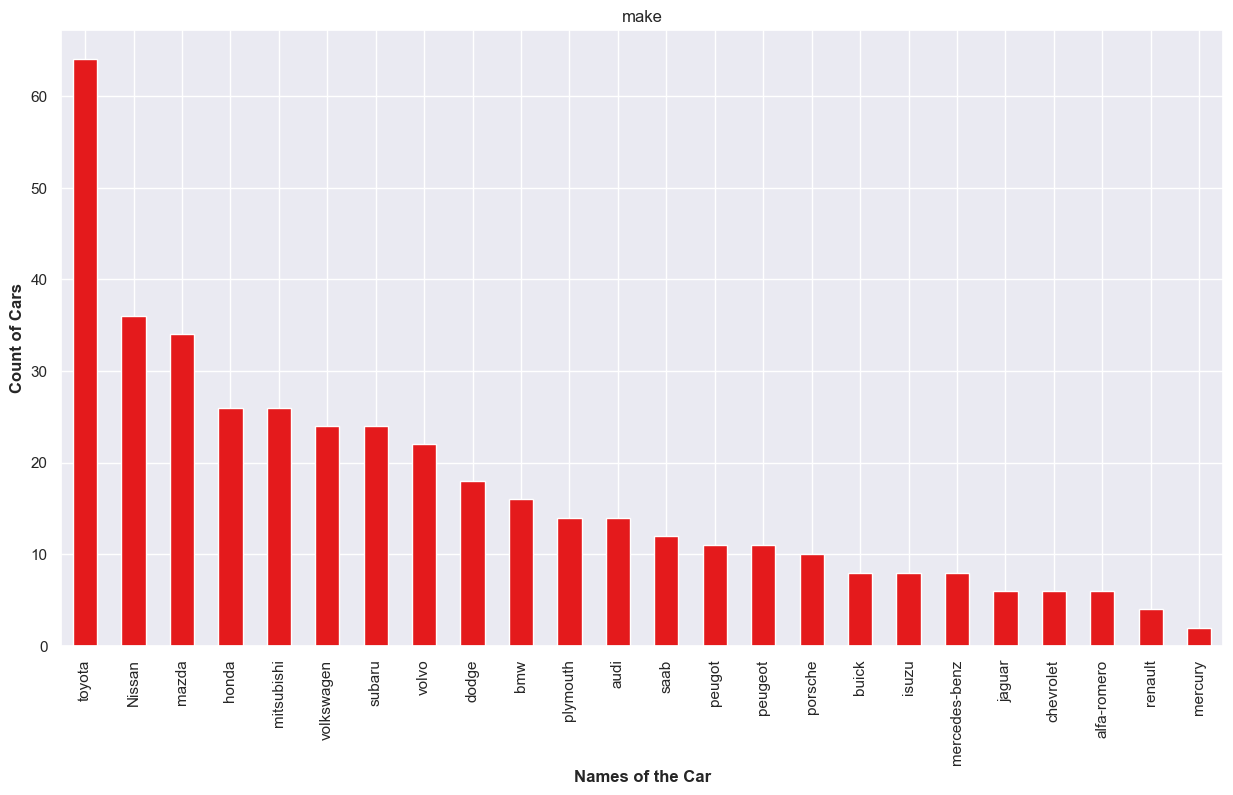

In [44]:
plt.rcParams['figure.figsize'] = [15,8]
ax=result['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('make')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

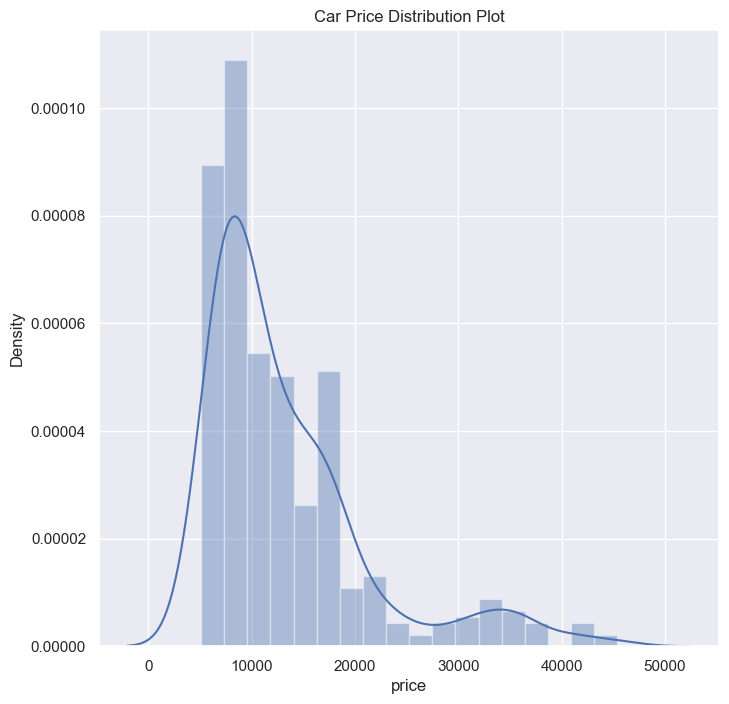

In [45]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(result['price'])

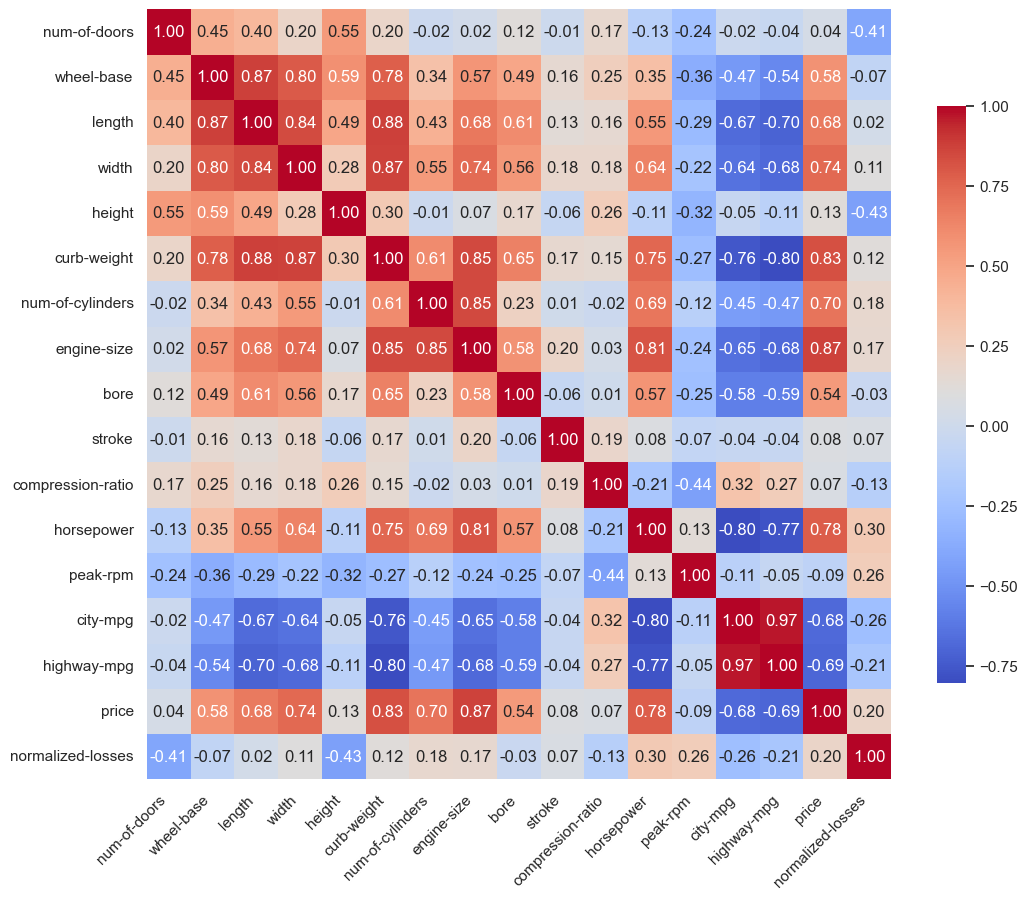

In [46]:
# Calculate the correlation matrix
corr = result.corr()

# Set up the matplotlib figure (optional: set the size of the figure)
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={"shrink": .75})

# Adjust the layout to make room for the x-axis and y-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [47]:
# Drop the column named 'column_name'
result = result.drop('city-mpg', axis=1) 


In [48]:
result = result.drop('curb-weight', axis=1)

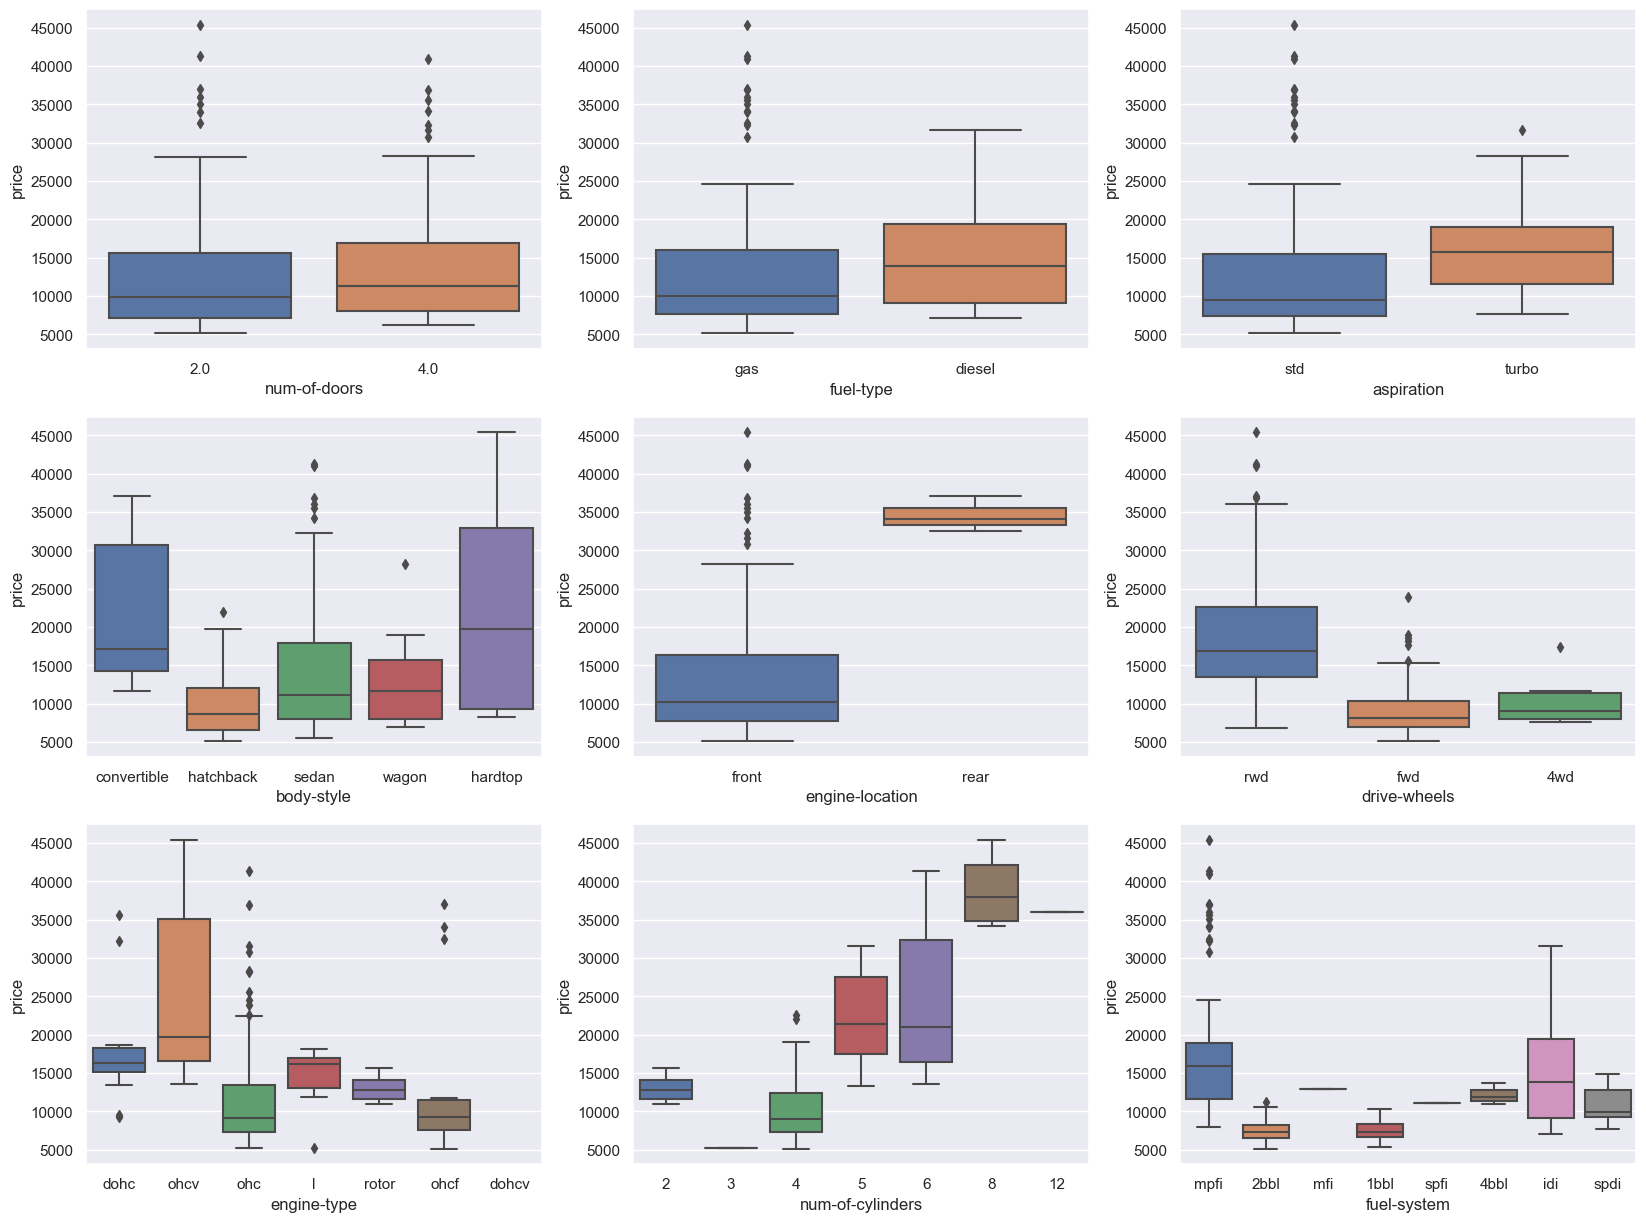

In [49]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'num-of-doors', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fuel-type', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'body-style', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'engine-location', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drive-wheels', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'engine-type', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuel-system', y = 'price', data = df_auto)
plt.show()

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency of Car Body')]

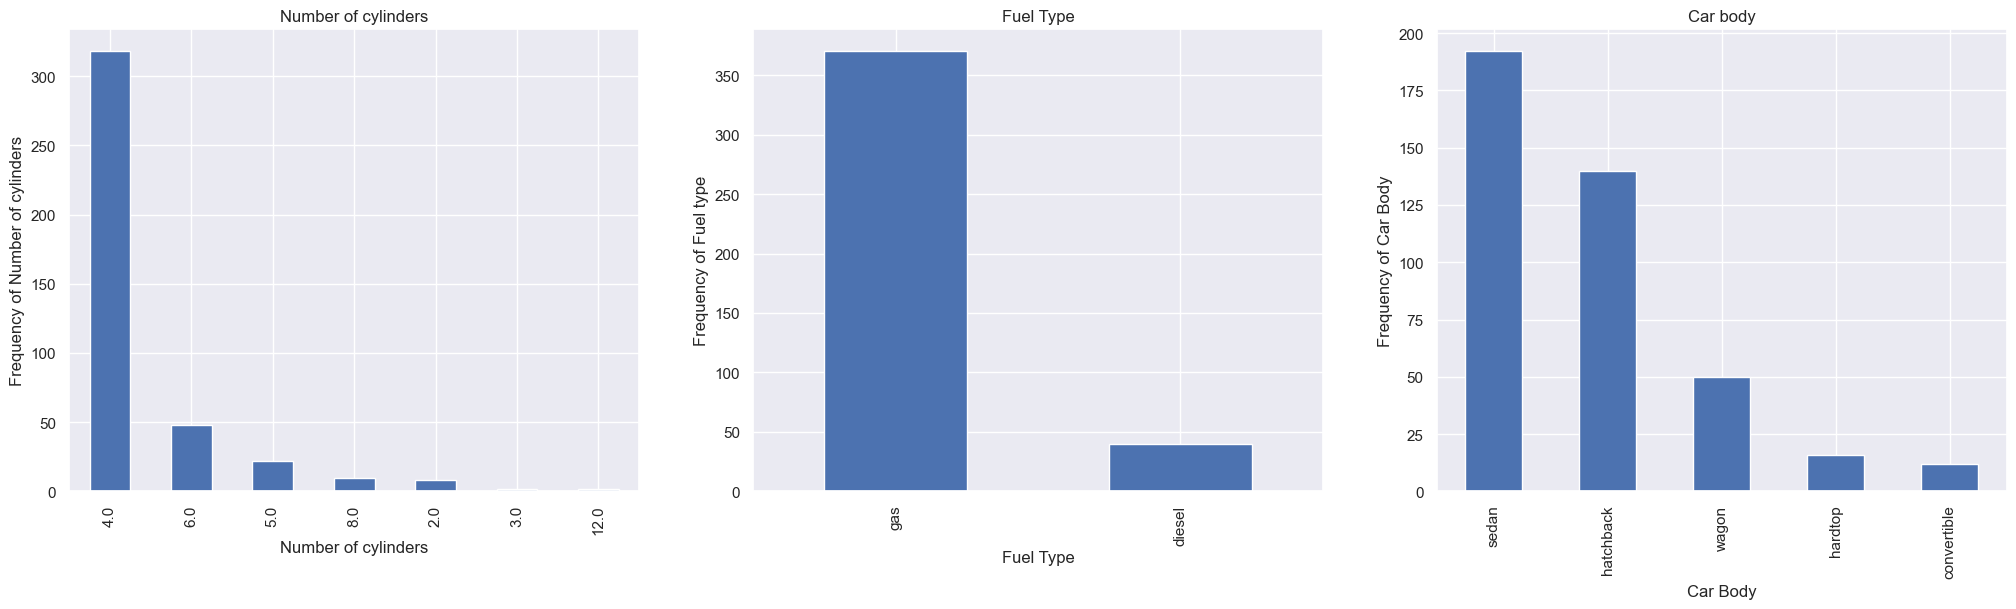

In [50]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = result['num-of-cylinders'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = result['fuel-type'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = result['body-style'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

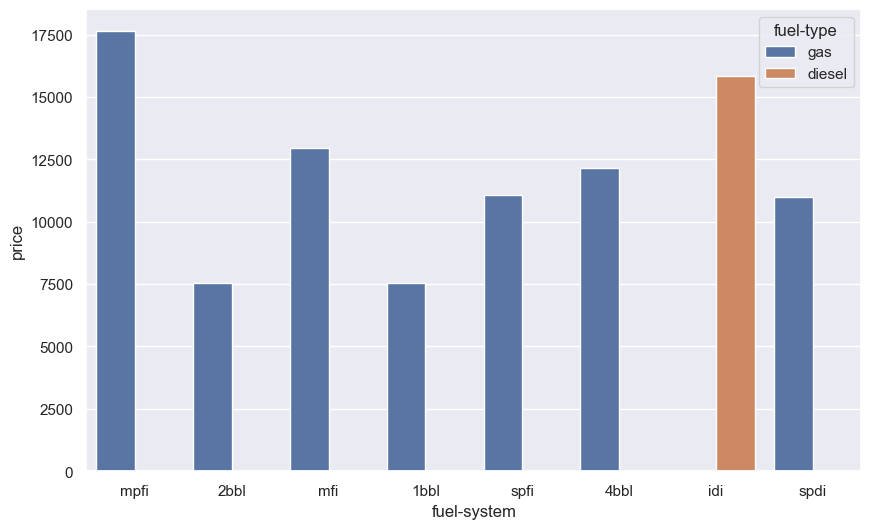

In [51]:
plt.figure(figsize = (10, 6))
sns.barplot(x='fuel-system', y='price', hue='fuel-type', data=result, ci=None)  # ci=None will remove the error bars
plt.show()




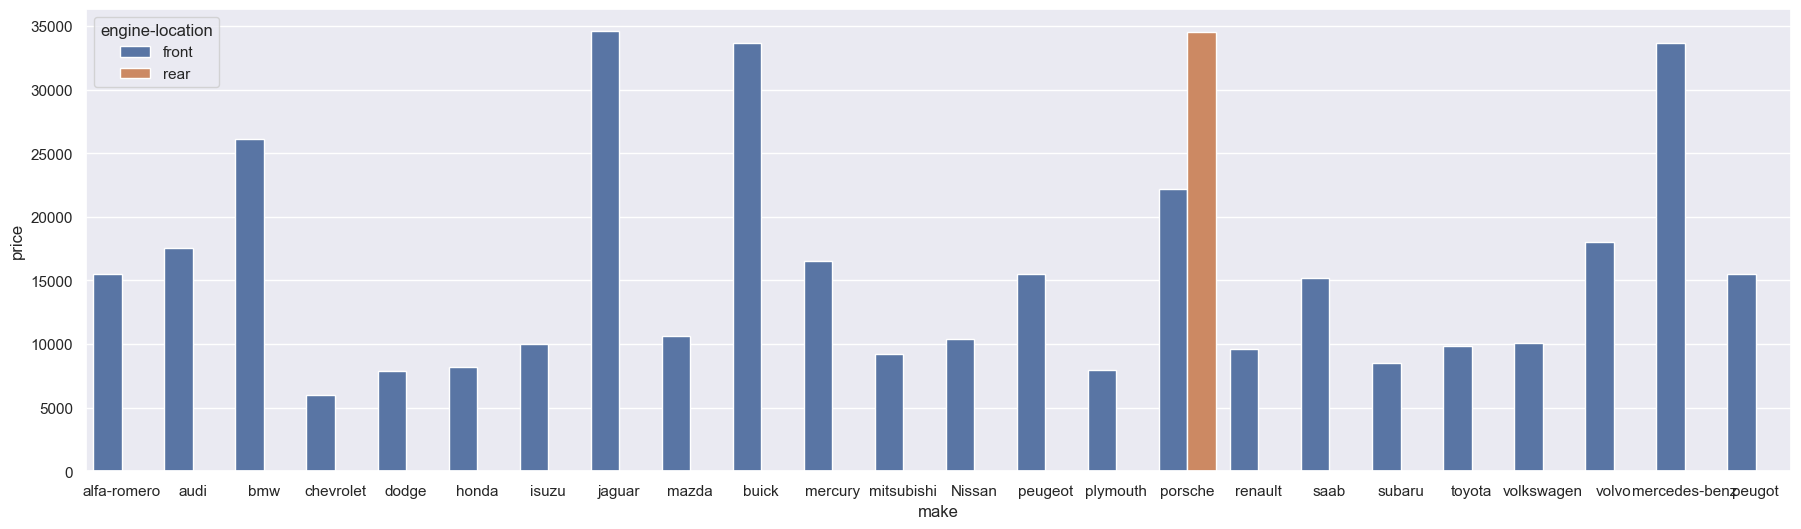

In [52]:
plt.figure(figsize=(22, 6))
sns.barplot(x='make', y='price', hue='engine-location', data=result, ci=None)  # ci=None will remove the error bars representing confidence intervals
plt.show()


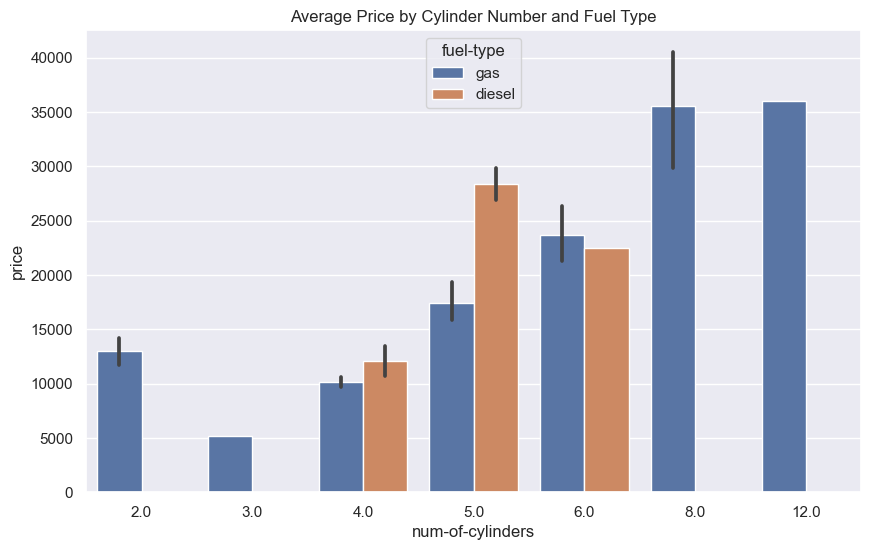

In [53]:
plt.figure(figsize = (10, 6))
sns.barplot(x='num-of-cylinders', y='price', hue='fuel-type', data=result, estimator=np.mean)
plt.title('Average Price by Cylinder Number and Fuel Type')
plt.show()


<Figure size 2000x600 with 0 Axes>

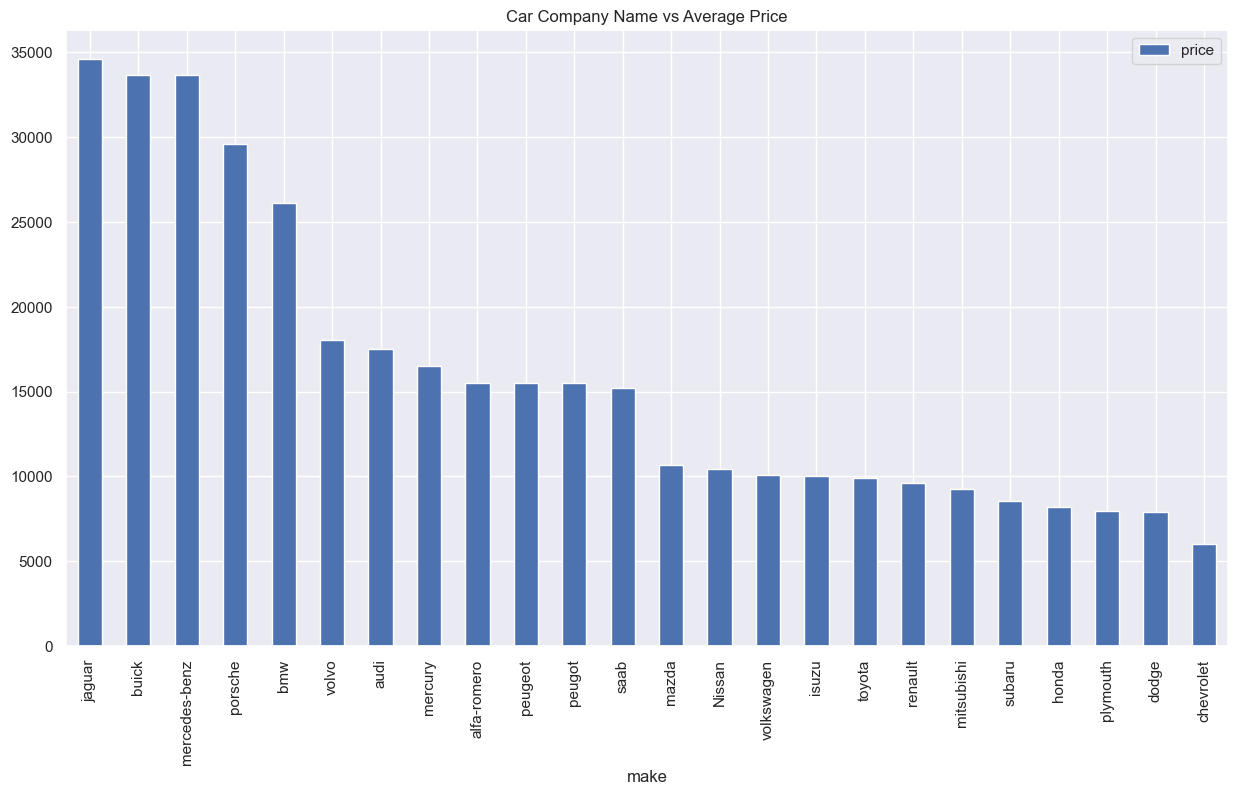

In [54]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(result.groupby(['make'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

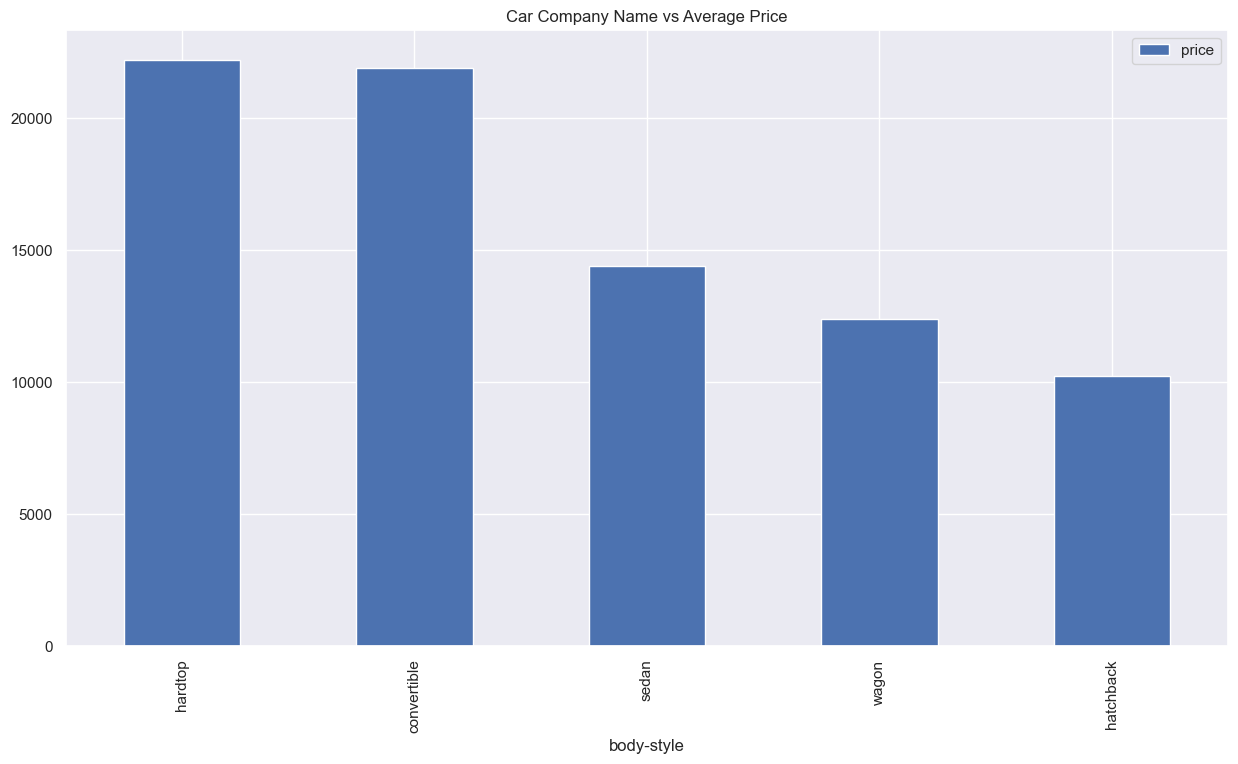

In [55]:
plt.figure(figsize=(10, 6))

df_autoy = pd.DataFrame(result.groupby(['body-style'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
category_cols = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']# Create a label encoder object
label_encoder = LabelEncoder()

for column in category_cols:
    result[column] = label_encoder.fit_transform(result[column])

In [58]:
result


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price,normalized-losses
0,3.0,1,1,0,2.0000,0,2,0,88.6000,168.8000,64.1000,48.8000,0,4.0000,130.0000,5,3.4700,2.6800,9.0000,111.0000,5000.0000,27.0000,13495.0000,NaN
1,3.0,1,1,0,2.0000,0,2,0,88.6000,168.8000,64.1000,48.8000,0,4.0000,130.0000,5,3.4700,2.6800,9.0000,111.0000,5000.0000,27.0000,16500.0000,NaN
2,1.0,1,1,0,2.0000,2,2,0,94.5000,171.2000,65.5000,52.4000,5,6.0000,152.0000,5,2.6800,3.4700,9.0000,154.0000,5000.0000,26.0000,16500.0000,NaN
3,2.0,2,1,0,4.0000,3,1,0,99.8000,176.6000,66.2000,54.3000,3,4.0000,109.0000,5,3.1900,3.4000,10.0000,102.0000,5500.0000,30.0000,13950.0000,NaN
4,2.0,2,1,0,4.0000,3,0,0,99.4000,176.6000,66.4000,54.3000,3,5.0000,136.0000,5,3.1900,3.4000,8.0000,115.0000,5500.0000,22.0000,17450.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-1.0,23,1,0,4.0000,3,2,0,109.1000,188.8000,68.9000,55.5000,3,4.0000,141.0000,5,3.7800,3.1500,9.5000,114.0000,5400.0000,28.0000,16845.0000,95.0000
406,-1.0,23,1,1,4.0000,3,2,0,109.1000,188.8000,68.8000,55.5000,3,4.0000,141.0000,5,3.7800,3.1500,8.7000,160.0000,5300.0000,25.0000,19045.0000,95.0000
407,-1.0,23,1,0,4.0000,3,2,0,109.1000,188.8000,68.9000,55.5000,5,6.0000,173.0000,5,3.5800,2.8700,8.8000,134.0000,5500.0000,23.0000,21485.0000,95.0000
408,-1.0,23,0,1,4.0000,3,2,0,109.1000,188.8000,68.9000,55.5000,3,6.0000,145.0000,3,3.0100,3.4000,23.0000,106.0000,4800.0000,27.0000,22470.0000,95.0000


In [59]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and all columns are to be scaled

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the DataFrame and transform all columns
result_scaled = pd.DataFrame(scaler.fit_transform(result), columns=result.columns)

# df_scaled now contains the scaled data


In [60]:
result_scaled

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price,normalized-losses
0,1.7435,-1.5317,0.3288,-0.4693,-1.1338,-3.0510,1.2133,-0.1219,-1.6908,-0.4265,-0.8448,-2.0204,-2.8651,-0.3529,0.0744,0.8696,0.5191,-1.8394,-0.2883,0.1728,-0.2632,-0.5461,0.0320,NaN
1,1.7435,-1.5317,0.3288,-0.4693,-1.1338,-3.0510,1.2133,-0.1219,-1.6908,-0.4265,-0.8448,-2.0204,-2.8651,-0.3529,0.0744,0.8696,0.5191,-1.8394,-0.2883,0.1728,-0.2632,-0.5461,0.4119,NaN
2,0.1335,-1.5317,0.3288,-0.4693,-1.1338,-0.7172,1.2133,-0.1219,-0.7086,-0.2315,-0.1906,-0.5435,1.8869,1.5020,0.6040,0.8696,-2.4049,0.6859,-0.2883,1.2632,-0.2632,-0.6916,0.4119,NaN
3,0.9385,-1.4009,0.3288,-0.4693,0.8863,0.4497,-0.5891,-0.1219,0.1737,0.2073,0.1365,0.2359,-0.0139,-0.3529,-0.4311,0.8696,-0.5173,0.4622,-0.0360,-0.0554,0.7876,-0.1094,0.0895,NaN
4,0.9385,-1.4009,0.3288,-0.4693,0.8863,0.4497,-2.3915,-0.1219,0.1071,0.2073,0.2300,0.2359,-0.0139,0.5746,0.2189,0.8696,-0.5173,0.4622,-0.5407,0.2742,0.7876,-1.2739,0.5320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-1.4765,1.3448,0.3288,-0.4693,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3982,0.7282,-0.0139,-0.3529,0.3392,0.8696,1.6665,-0.3370,-0.1622,0.2489,0.5774,-0.4005,0.4555,-0.7641
406,-1.4765,1.3448,0.3288,2.1309,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3515,0.7282,-0.0139,-0.3529,0.3392,0.8696,1.6665,-0.3370,-0.3641,1.4153,0.3673,-0.8372,0.7336,-0.7641
407,-1.4765,1.3448,0.3288,-0.4693,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3982,0.7282,1.8869,1.5020,1.1096,0.8696,0.9262,-1.2320,-0.3388,0.7560,0.7876,-1.1283,1.0421,-0.7641
408,-1.4765,1.3448,-3.0414,2.1309,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3982,0.7282,-0.0139,1.5020,0.4355,-0.1263,-1.1835,0.4622,3.2449,0.0460,-0.6835,-0.5461,1.1666,-0.7641


In [61]:
result_scaled=result_scaled.drop('normalized-losses', axis=1)

In [62]:
result_scaled

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,1.7435,-1.5317,0.3288,-0.4693,-1.1338,-3.0510,1.2133,-0.1219,-1.6908,-0.4265,-0.8448,-2.0204,-2.8651,-0.3529,0.0744,0.8696,0.5191,-1.8394,-0.2883,0.1728,-0.2632,-0.5461,0.0320
1,1.7435,-1.5317,0.3288,-0.4693,-1.1338,-3.0510,1.2133,-0.1219,-1.6908,-0.4265,-0.8448,-2.0204,-2.8651,-0.3529,0.0744,0.8696,0.5191,-1.8394,-0.2883,0.1728,-0.2632,-0.5461,0.4119
2,0.1335,-1.5317,0.3288,-0.4693,-1.1338,-0.7172,1.2133,-0.1219,-0.7086,-0.2315,-0.1906,-0.5435,1.8869,1.5020,0.6040,0.8696,-2.4049,0.6859,-0.2883,1.2632,-0.2632,-0.6916,0.4119
3,0.9385,-1.4009,0.3288,-0.4693,0.8863,0.4497,-0.5891,-0.1219,0.1737,0.2073,0.1365,0.2359,-0.0139,-0.3529,-0.4311,0.8696,-0.5173,0.4622,-0.0360,-0.0554,0.7876,-0.1094,0.0895
4,0.9385,-1.4009,0.3288,-0.4693,0.8863,0.4497,-2.3915,-0.1219,0.1071,0.2073,0.2300,0.2359,-0.0139,0.5746,0.2189,0.8696,-0.5173,0.4622,-0.5407,0.2742,0.7876,-1.2739,0.5320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,-1.4765,1.3448,0.3288,-0.4693,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3982,0.7282,-0.0139,-0.3529,0.3392,0.8696,1.6665,-0.3370,-0.1622,0.2489,0.5774,-0.4005,0.4555
406,-1.4765,1.3448,0.3288,2.1309,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3515,0.7282,-0.0139,-0.3529,0.3392,0.8696,1.6665,-0.3370,-0.3641,1.4153,0.3673,-0.8372,0.7336
407,-1.4765,1.3448,0.3288,-0.4693,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3982,0.7282,1.8869,1.5020,1.1096,0.8696,0.9262,-1.2320,-0.3388,0.7560,0.7876,-1.1283,1.0421
408,-1.4765,1.3448,-3.0414,2.1309,0.8863,0.4497,1.2133,-0.1219,1.7219,1.1985,1.3982,0.7282,-0.0139,1.5020,0.4355,-0.1263,-1.1835,0.4622,3.2449,0.0460,-0.6835,-0.5461,1.1666


In [63]:
X = result_scaled.drop('price', axis=1)  # Replace 'target' with the actual name of your target column
y = result_scaled['price']

# Split the data into training and temporary set (70% training, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the temporary set into validation and test sets (2/3 validation, 1/3 test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)


In [64]:
# X_test_1 = sm.add_constant(X_test)

In [65]:
# Check the size of each set to confirm the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 287
Validation set size: 82
Test set size: 41


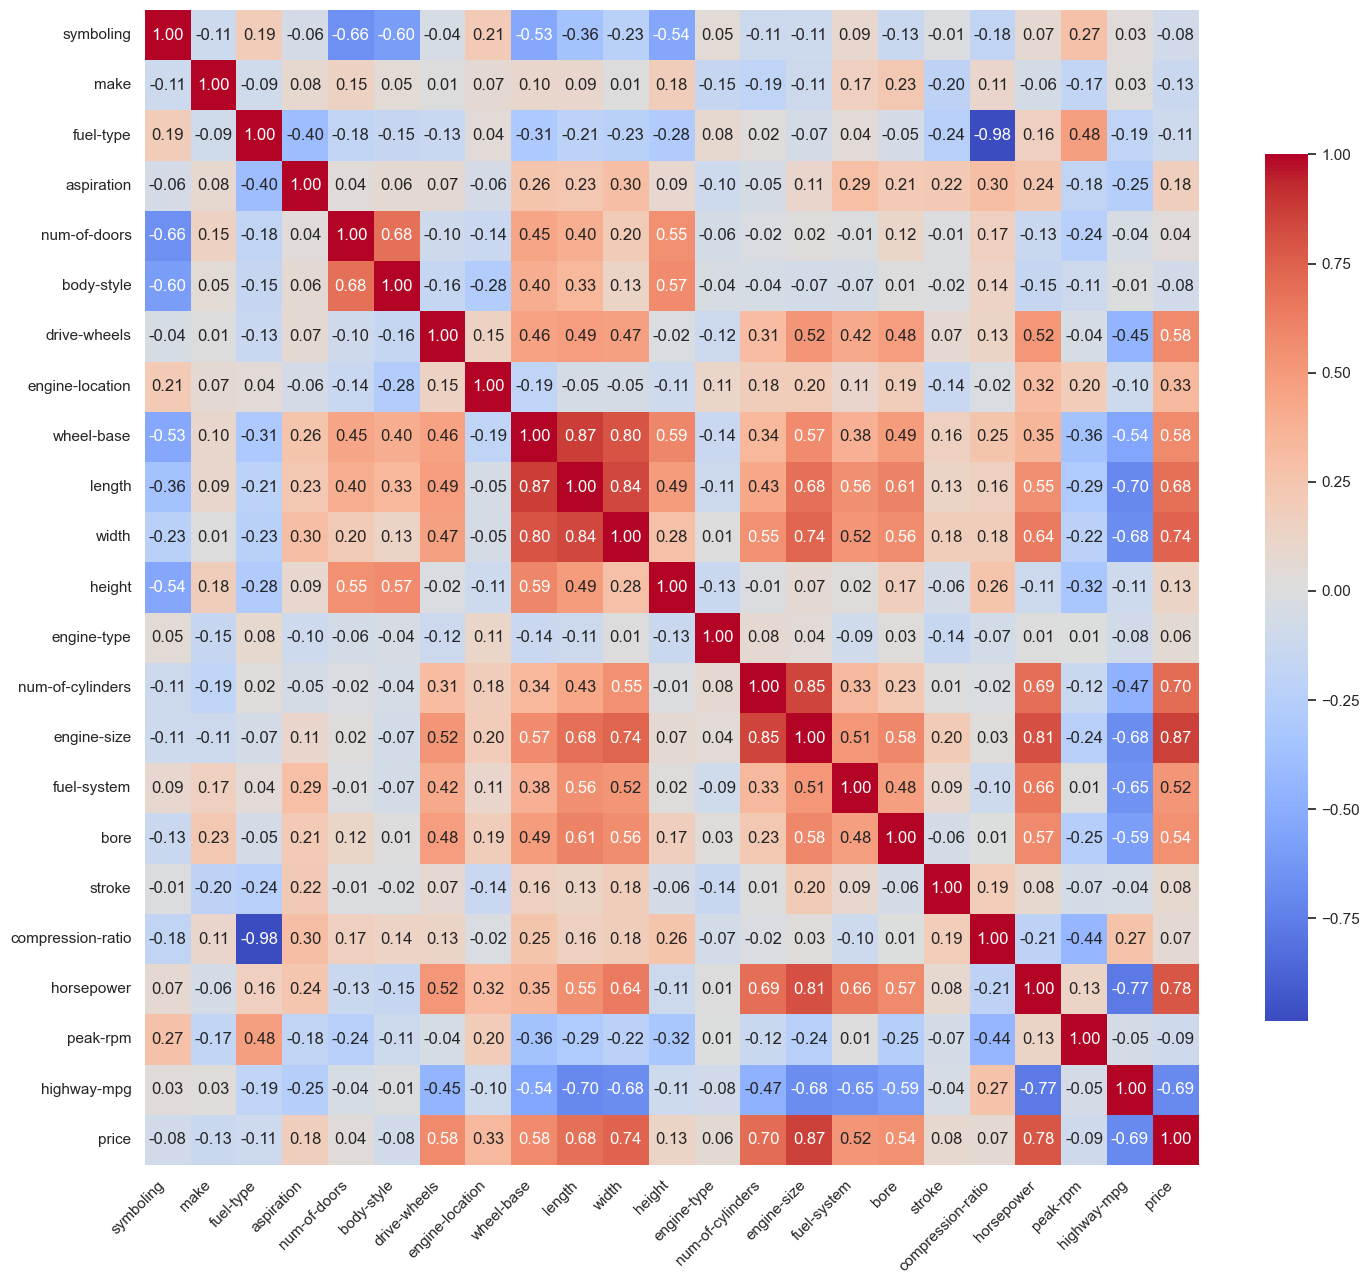

In [66]:
#plt.figure(figsize = (20, 20))
#sns.heatmap(result_scaled.corr(), cmap="RdYlGn")
#plt.show()


# Calculate the correlation matrix
corr = result_scaled.corr()

# Set up the matplotlib figure (optional: set the size of the figure)
plt.figure(figsize=(17, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={"shrink": .75})

# Adjust the layout to make room for the x-axis and y-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [67]:
col = ['highway-mpg','horsepower','engine-size','width']

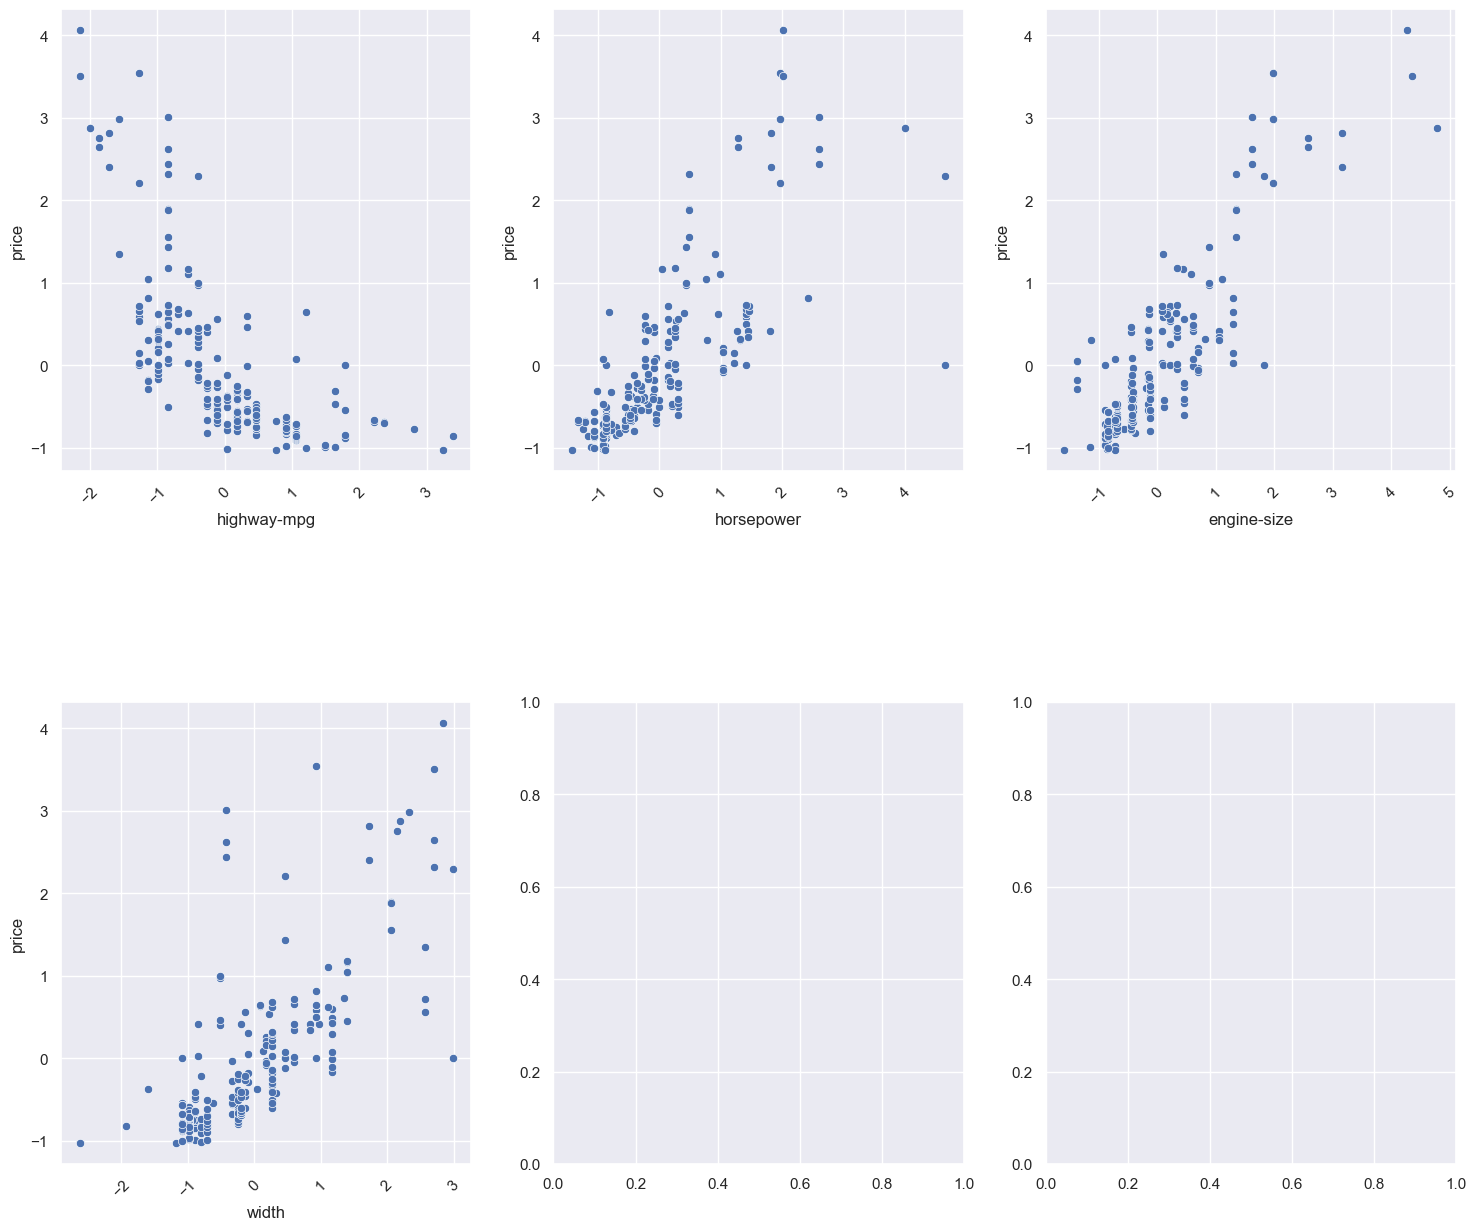

In [68]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=result_scaled, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [69]:
X_train_1 = X_train['horsepower']

In [70]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [71]:
# Check parameters created

lr_1.params

const        -0.0204
horsepower   0.8034 
dtype: float64

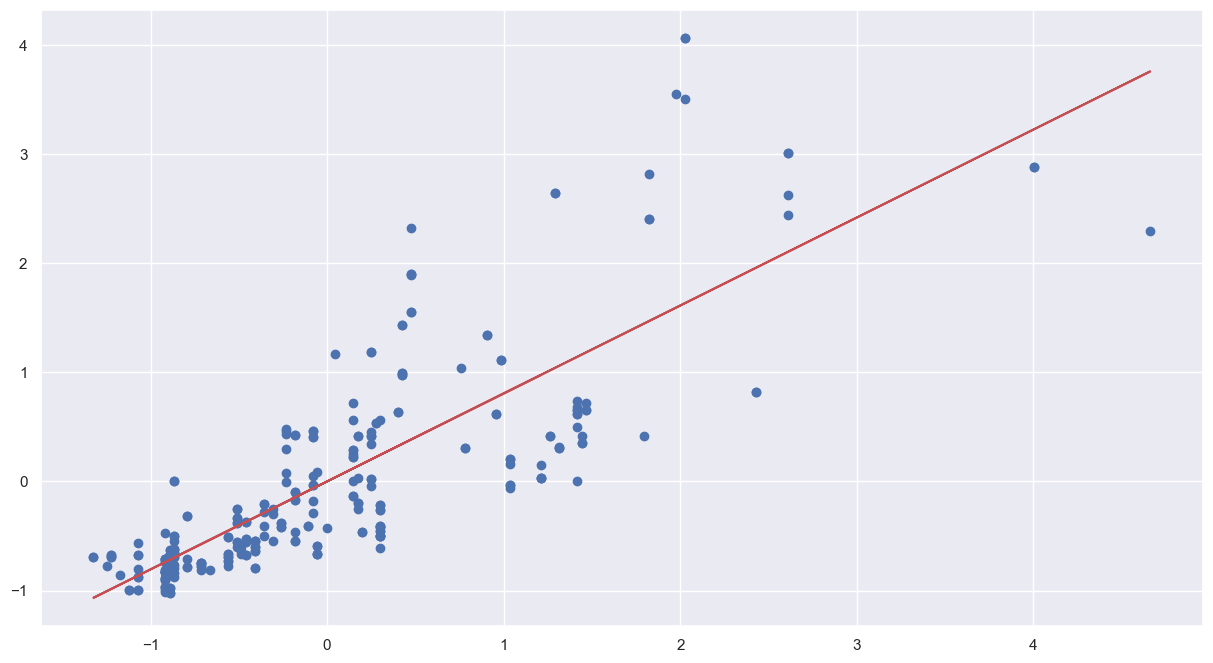

In [72]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [73]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     537.4
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.51e-67
Time:                        12:19:55   Log-Likelihood:                -247.37
No. Observations:                 287   AIC:                             498.7
Df Residuals:                     285   BIC:                             506.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.034     -0.600      0.5

In [74]:
X_train_2 = X_train[['horsepower', 'highway-mpg', 'engine-size']]

In [75]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a third fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [76]:
lr_2.params

const         -0.0202
horsepower    0.2067 
highway-mpg   -0.1535
engine-size   0.5821 
dtype: float64

In [77]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     353.4
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.40e-95
Time:                        12:19:55   Log-Likelihood:                -175.98
No. Observations:                 287   AIC:                             360.0
Df Residuals:                     283   BIC:                             374.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0202      0.027     -0.761      

In [78]:
X_train_3 = X_train[['highway-mpg','horsepower','engine-size','width']]

In [79]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [80]:
lr_3.params

const         -0.0104
highway-mpg   -0.0632
horsepower    0.2294 
engine-size   0.4730 
width         0.2097 
dtype: float64

In [81]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     292.7
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.73e-99
Time:                        12:19:56   Log-Likelihood:                -164.21
No. Observations:                 287   AIC:                             338.4
Df Residuals:                     282   BIC:                             356.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0104      0.026     -0.407      

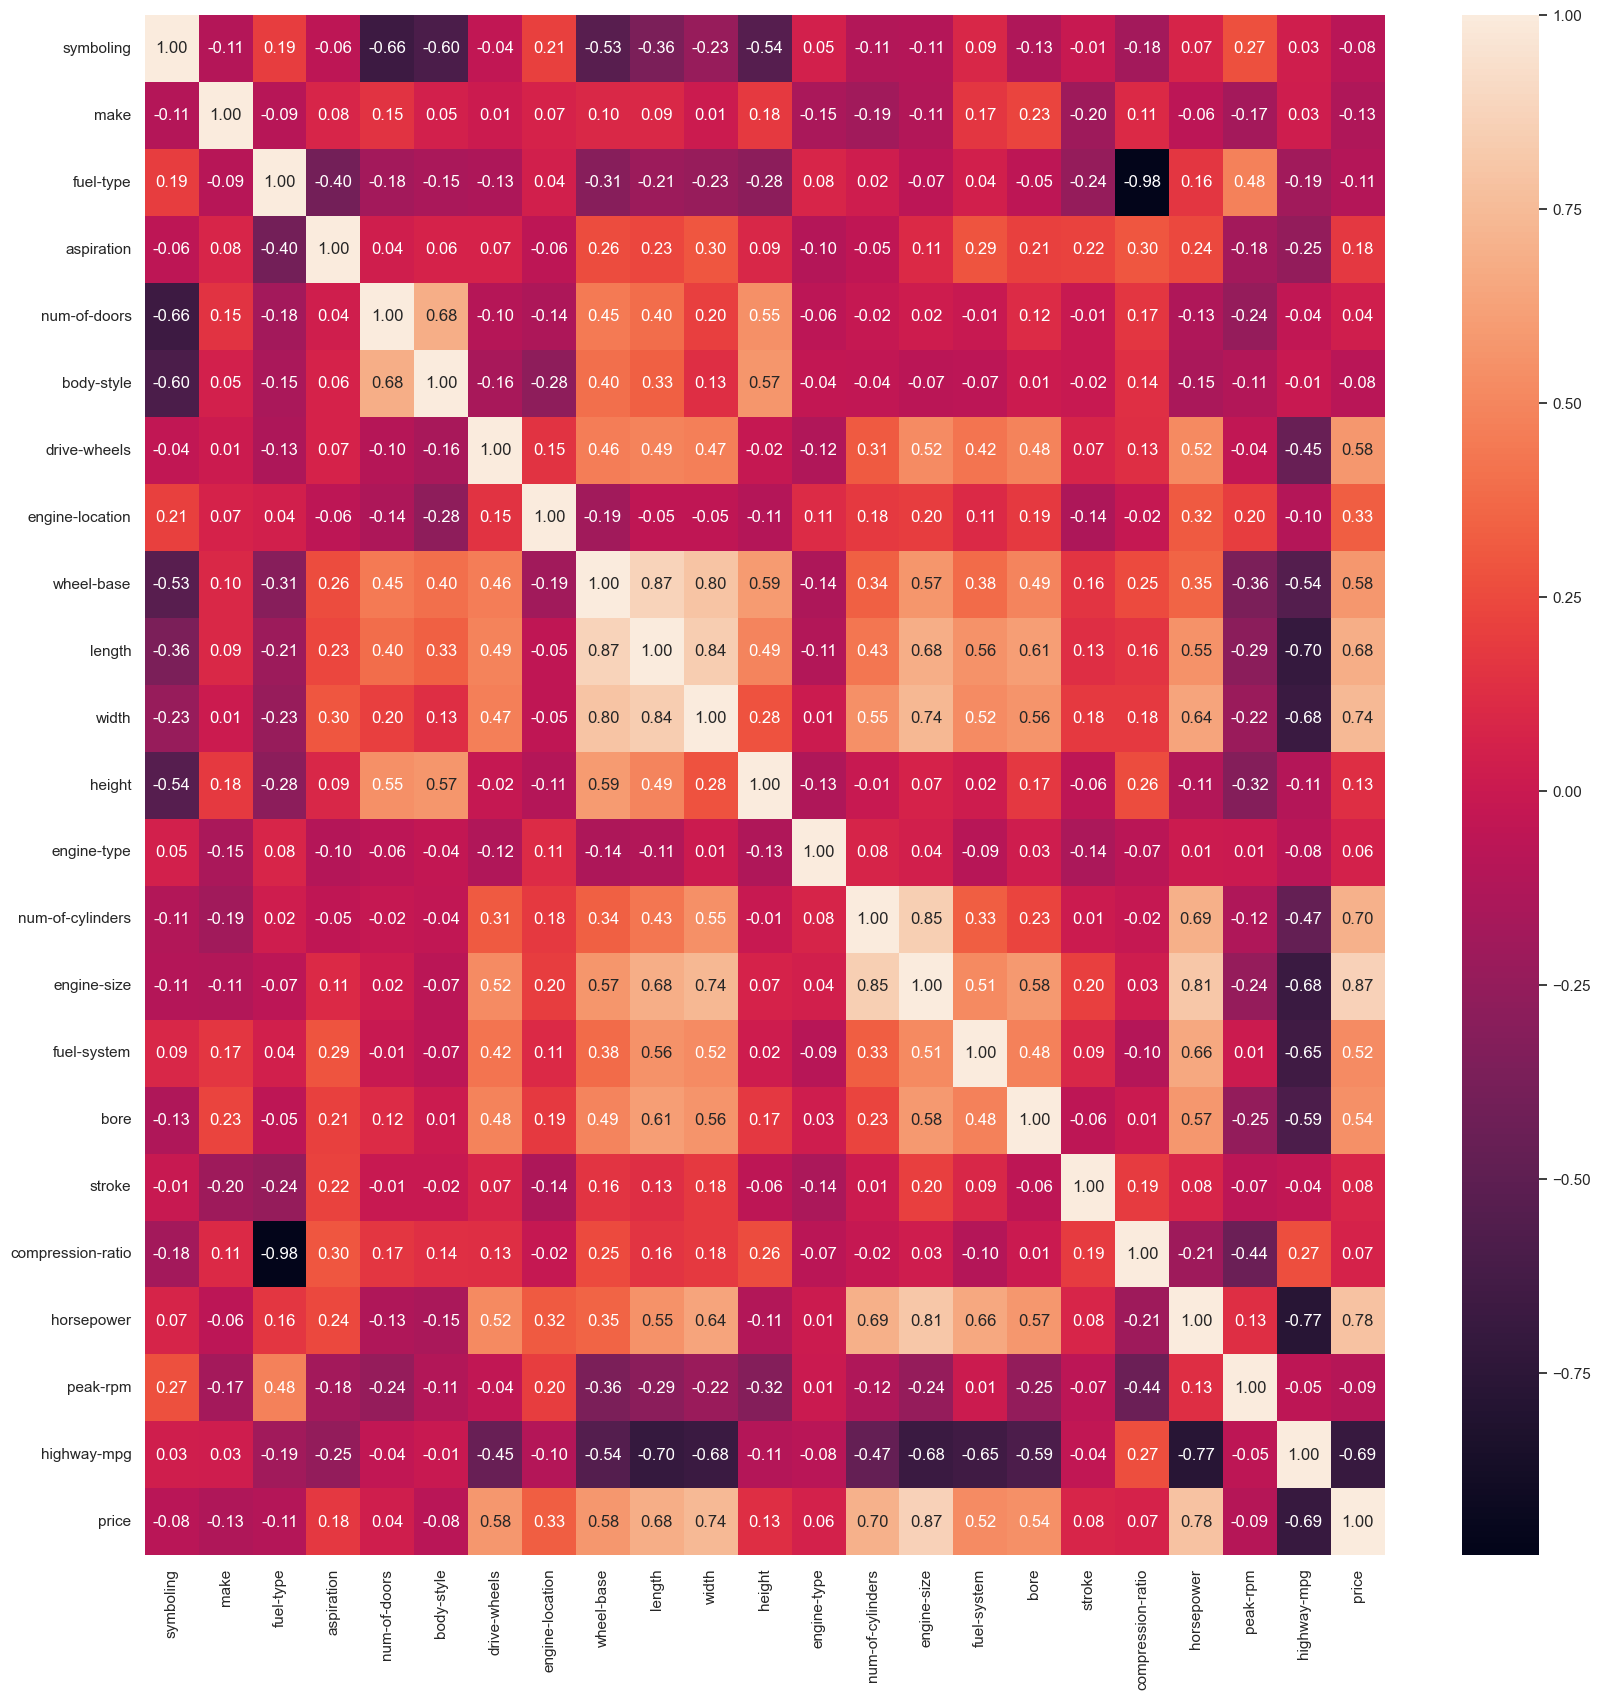

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and 'target' is your target feature

# Get correlation matrix
corrmat = result_scaled.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, fmt=".2f")
plt.show()


In [83]:
# Calculate the number of missing values in each column
missing_values = result_scaled.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

# If you want to see the percentage of missing values in each column, you can do:
missing_percentage = (result_scaled.isnull().sum() / len(result_scaled)) * 100
print(missing_percentage)


symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
highway-mpg          0
price                0
dtype: int64
symboling           0.0000
make                0.0000
fuel-type           0.0000
aspiration          0.0000
num-of-doors        0.0000
body-style          0.0000
drive-wheels        0.0000
engine-location     0.0000
wheel-base          0.0000
length              0.0000
width               0.0000
height              0.0000
engine-type         0.0000
num-of-cylinders    0.0000
engine-size         0.0000
fuel-system         0.0000
bore                0.0000

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



# Create a linear regression model to use in feature selection
model = LinearRegression()

# Create RFE model and select 10 attributes
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_train.columns[rfe.support_]))

Selected features: ['make', 'engine-location', 'wheel-base', 'length', 'width', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'horsepower']


In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 11),
 ('make', True, 1),
 ('fuel-type', False, 6),
 ('aspiration', False, 7),
 ('num-of-doors', False, 10),
 ('body-style', False, 9),
 ('drive-wheels', False, 5),
 ('engine-location', True, 1),
 ('wheel-base', True, 1),
 ('length', True, 1),
 ('width', True, 1),
 ('height', False, 8),
 ('engine-type', False, 13),
 ('num-of-cylinders', True, 1),
 ('engine-size', True, 1),
 ('fuel-system', False, 12),
 ('bore', True, 1),
 ('stroke', True, 1),
 ('compression-ratio', False, 2),
 ('horsepower', True, 1),
 ('peak-rpm', False, 3),
 ('highway-mpg', False, 4)]

In [86]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['make', 'engine-location', 'wheel-base', 'length', 'width',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'horsepower'],
      dtype='object')

In [87]:
X_train_rfe = X_train[col_sup]

In [88]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     190.4
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          1.33e-117
Time:                        12:20:00   Log-Likelihood:                -102.90
No. Observations:                 287   AIC:                             227.8
Df Residuals:                     276   BIC:                             268.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0084      0.021  

In [89]:
X_train_4 = X_train[['make', 'engine-location', 'wheel-base', 'length', 'width',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'horsepower']]

In [90]:
# Add a constant
X_train_4c = sm.add_constant(X_train_4)

# Create a third fitted model
lr_4 = sm.OLS(y_train, X_train_4c).fit()

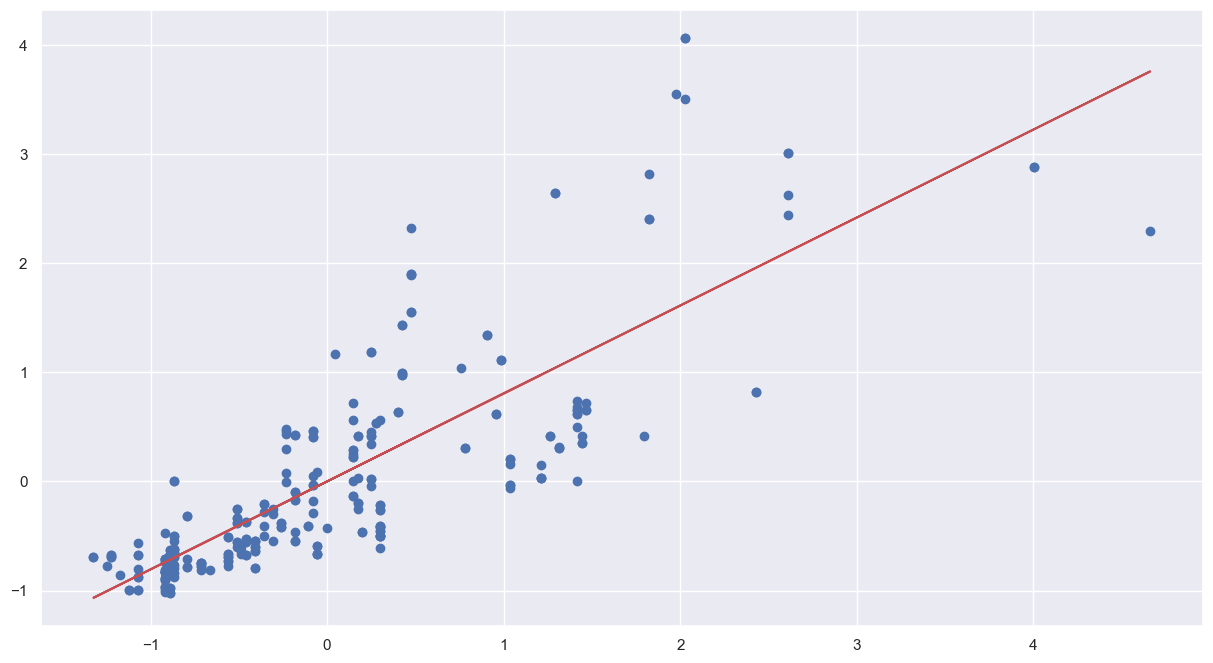

In [91]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [92]:
lr_4.params

const              -0.0084
make               -0.1102
engine-location    0.2342 
wheel-base         0.2299 
length             -0.0920
width              0.2292 
num-of-cylinders   -0.2162
engine-size        0.6549 
bore               -0.1169
stroke             -0.1458
horsepower         0.2339 
dtype: float64

In [93]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     190.4
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          1.33e-117
Time:                        12:20:00   Log-Likelihood:                -102.90
No. Observations:                 287   AIC:                             227.8
Df Residuals:                     276   BIC:                             268.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0084      0.021  

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,engine-size,15.7500
5,num-of-cylinders,8.8100
3,length,6.6700
2,wheel-base,6.1700
4,width,5.2600
9,horsepower,4.3700
7,bore,3.2600
8,stroke,1.7100
1,engine-location,1.3600
0,make,1.2500


In [95]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('num-of-cylinders', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     201.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          4.49e-116
Time:                        12:20:00   Log-Likelihood:                -109.38
No. Observations:                 287   AIC:                             238.8
Df Residuals:                     277   BIC:                             275.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0094      0.021     

In [96]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your features and target variable for training
lin_reg = LinearRegression()
rfe = RFE(estimator=lin_reg, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_train, y_train)
model = lin_reg.fit(X_rfe, y_train)


In [97]:
from sklearn.svm import SVR

# SVM requires data to be scaled. Assuming X_train and y_train are already scaled
svm = SVR(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_train, y_train)
model = svm.fit(X_rfe, y_train)


In [98]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X_train and y_train are your features and target variable for training
decision_tree = DecisionTreeRegressor()
rfe = RFE(estimator=decision_tree, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_train, y_train)
model = decision_tree.fit(X_rfe, y_train)


In [99]:
print(rfe.support_)
print(rfe.ranking_)


[False False False False False  True False False False  True  True  True
 False False  True False  True False  True  True  True  True]
[ 5  4 12  6  8  1 10 13  2  1  1  1  7  9  1 11  1  3  1  1  1  1]


In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,length,6.4200
2,wheel-base,6.1700
4,width,5.2500
5,engine-size,4.3300
8,horsepower,4.3200
6,bore,1.8800
1,engine-location,1.3500
0,make,1.2500
7,stroke,1.1600


In [101]:
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     201.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          4.49e-116
Time:                        12:20:01   Log-Likelihood:                -109.38
No. Observations:                 287   AIC:                             238.8
Df Residuals:                     277   BIC:                             275.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0094      0.021     

In [102]:
# Dropping highly correlated variables and insignificant variables

#X_train_rfe1 = X_train_rfe.drop('length', 1,)
X_train_rfe1.drop('length', axis=1, inplace=True)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     226.7
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          4.50e-117
Time:                        12:20:01   Log-Likelihood:                -109.84
No. Observations:                 287   AIC:                             237.7
Df Residuals:                     278   BIC:                             270.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0100      0.021     

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,width,5.0700
4,engine-size,4.3300
7,horsepower,4.1300
2,wheel-base,3.6600
5,bore,1.8400
1,engine-location,1.3500
0,make,1.2500
6,stroke,1.1600


In [104]:
# Dropping highly correlated variables and insignificant variables

#X_train_rfe1 = X_train_rfe.drop('length', 1,)
X_train_rfe1.drop('width', axis=1, inplace=True)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     241.3
Date:                Thu, 23 Nov 2023   Prob (F-statistic):          2.11e-114
Time:                        12:20:01   Log-Likelihood:                -119.09
No. Observations:                 287   AIC:                             254.2
Df Residuals:                     279   BIC:                             283.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0155      0.022     

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,engine-size,4.2900
6,horsepower,3.4300
2,wheel-base,1.9400
4,bore,1.8300
1,engine-location,1.3200
0,make,1.2500
5,stroke,1.1600


In [106]:
# Dropping highly correlated variables and insignificant variables

#X_train_rfe1 = X_train_rfe.drop('length', 1,)
X_train_rfe1.drop('bore', axis=1, inplace=True)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1).fit()

#Summary of linear model
print(lm_rfe1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              282.3
Date:                Thu, 23 Nov 2023   Prob (F-statistic):                   7.87e-116
Time:                        12:20:01   Log-Likelihood:                         -119.70
No. Observations:                 287   AIC:                                      251.4
Df Residuals:                     281   BIC:                                      273.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,engine-size,4.2200
5,horsepower,3.2900
2,wheel-base,1.8300
1,engine-location,1.3100
0,make,1.1300
4,stroke,1.1300


In [108]:
# Predicting the price of training set.
y_train_price = lm_rfe1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

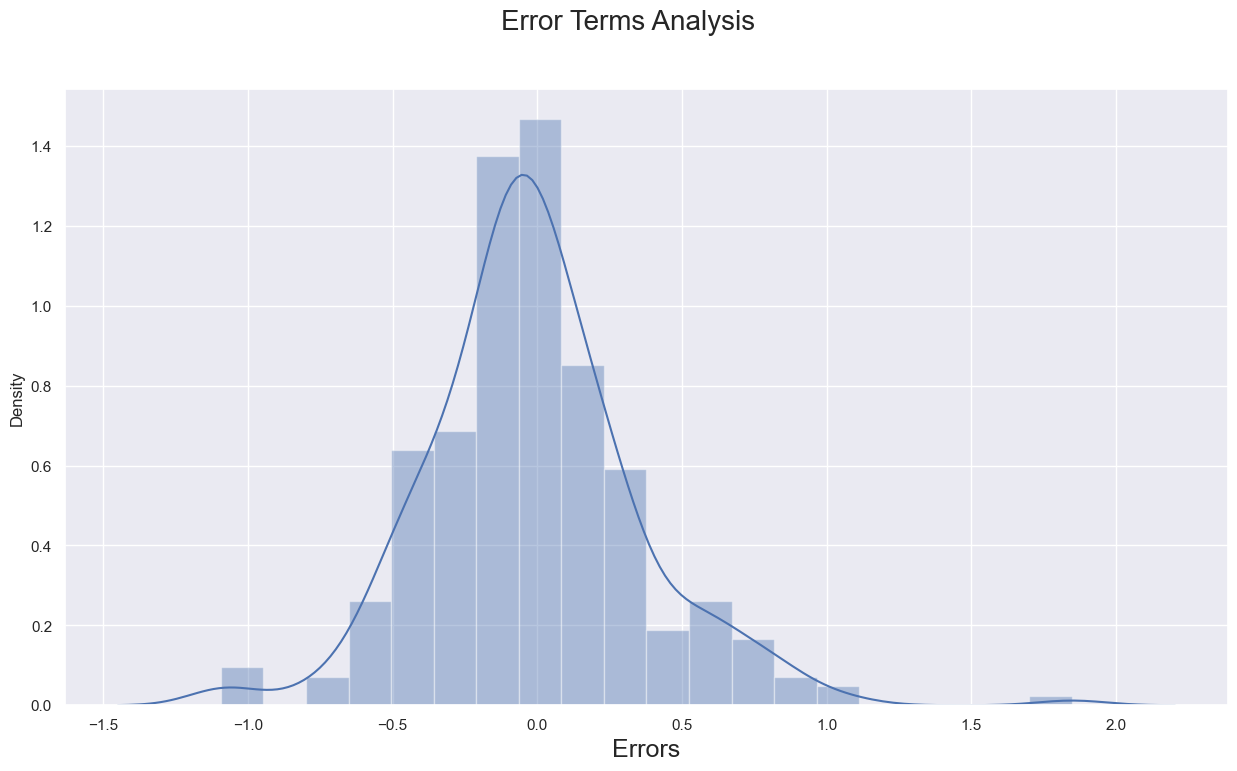

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

In [110]:
# Adding constant
# X_test_1 = sm.add_constant(X_test)

X_test_1 = X_test[X_train_rfe1.columns]
# X_test_1 = sm.add_constant(X_test_1)

# X_test_new = X_test_1[X_train_rfe1.columns]




In [111]:
y_pred = lm_rfe1.predict(X_test_1)

Text(0, 0.5, 'y_pred')

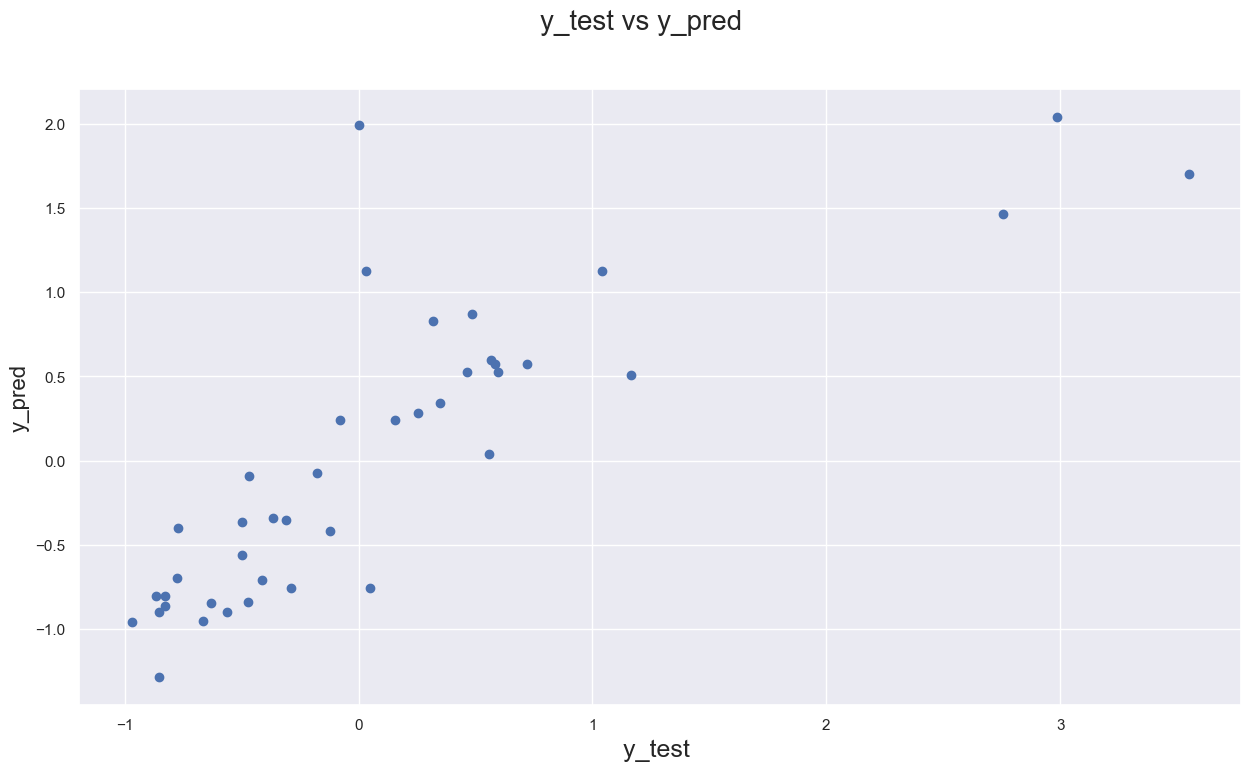

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

In [113]:
r2_score(y_test, y_pred)

0.6592387791961221

In [114]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100,  # The number of trees in the forest
                                            random_state=42,  # Seed for reproducibility
                                            n_jobs=-1)        # Use all cores available

# Fit the model on the training data
random_forest_model.fit(X_train_rfe1, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test_1)

print(f"Root Mean Squared Error: {r2_score(y_test, y_pred)}")

# Optionally, if you want to inspect the feature importances:
feature_importances = random_forest_model.feature_importances_

# If you want to turn feature importances into a DataFrame:
import pandas as pd
feature_importances_df = pd.DataFrame({
    'Feature': X_train_rfe1.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)


Root Mean Squared Error: 0.8006904841715414
           Feature  Importance
3  engine-size     0.6708     
5  horsepower      0.2239     
2  wheel-base      0.0764     
4  stroke          0.0178     
0  make            0.0111     
1  engine-location 0.0000     


In [115]:

# Add a constant to the feature variables if it's not already included
X = sm.add_constant(X_train_rfe1)

# Choose the family for the GLM, for example, a Gaussian family for a normal distribution
# Other families include Binomial for logistic regression, Poisson for count data, etc.
glm_model = sm.GLM(y_train, X, family=sm.families.Gaussian())

# Fit the GLM model
glm_results = glm_model.fit()

# Print the summary of the GLM model
print(glm_results.summary())

# List of features used to fit the model
model_features = glm_results.model.exog_names

# Make sure the test set includes all the features used in the model
missing_features = set(model_features) - set(X_test_1.columns)

if missing_features:
    # If there are missing features, this needs to be handled before prediction
    print(f"The following features are missing in the test set: {missing_features}")
else:
    # If all features are present, ensure the constant term is added, if necessary
    if 'const' in model_features and 'const' not in X_test_1.columns:
        X_test_1 = sm.add_constant(X_test_1, has_constant='add')
    
    # Check if the shapes now align
    if X_test_1.shape[1] == len(model_features):
        # If shapes align, you can proceed with prediction
        predictions = glm_results.predict(X_test_1)
    else:
        # If shapes do not align, there's still a mismatch in the number of features
        print("There's still a mismatch in the number of features.")



print(f'R Squared Error: {r2_score(y_test, y_pred)}')


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  287
Model:                            GLM   Df Residuals:                      280
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                         0.13795
Method:                          IRLS   Log-Likelihood:                -119.43
Date:                Thu, 23 Nov 2023   Deviance:                       38.625
Time:                        12:20:04   Pearson chi2:                     38.6
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9972
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0159      0.022     

In [116]:
from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np

# Define the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect scores
r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X_train_rfe1):
    # Split data
    X_train_cv, X_test_cv = X_train_rfe1.iloc[train_index], X_train_rfe1.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Add a constant to the model
#     X_train_cv_const = sm.add_constant(X_train_cv)
#     X_test_cv_const = sm.add_constant(X_test_cv)

    # Create and fit the model
    glm_cv = sm.GLM(y_train_cv, X_train_cv, family=sm.families.Gaussian()).fit()

    # Predict on the test set
    y_pred_cv = glm_cv.predict(X_test_cv)

    # Evaluate the model
    r2_score_cv = r2_score(y_test_cv, y_pred_cv)
    r2_scores.append(r2_score_cv)

# Calculate the average R-squared score
average_r2_score = np.mean(r2_scores)

print("Cross-Validation R-squared Scores:", r2_scores)
print("Average R-squared Score:", average_r2_score)
print(glm_results.summary())

Cross-Validation R-squared Scores: [0.8760372246585328, 0.8018012216654369, 0.8337005376736161, 0.8925048045714348, 0.7535022022322782]
Average R-squared Score: 0.8315091981602597
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  287
Model:                            GLM   Df Residuals:                      280
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                         0.13795
Method:                          IRLS   Log-Likelihood:                -119.43
Date:                Thu, 23 Nov 2023   Deviance:                       38.625
Time:                        12:20:04   Pearson chi2:                     38.6
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9972
Covariance Type:            nonrobust                                         
                      coef    

In [117]:
from sklearn.svm import SVR  # Support Vector Regressor

# Creating a SVM regressor object with a radial basis function kernel
# Note: Other common kernels include 'linear', 'poly', and 'sigmoid'
svr_model = SVR(kernel='rbf')


# Fitting the model to the training data
svr_model.fit(X_train_rfe1, y_train)

# Predicting the target values for the testing set
y_pred = svr_model.predict(X_test_1)


# Calculating the R-squared for the model
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')


R-squared: 0.6711402338641062


In [118]:
from sklearn.tree import DecisionTreeRegressor


# Creating the decision tree regressor object
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fitting the regressor to the training data
dt_regressor.fit(X_train_rfe1, y_train)

# Predicting the target values for the testing set
y_pred = dt_regressor.predict(X_test_1)

# Calculating performance metrics
r2 = r2_score(y_test, y_pred)

# Printing performance metrics
print(f'R-squared Score: {r2}')

R-squared Score: 0.8183135714574965


In [119]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Creating pipelines for each regression model
pipelines = {
    'lr': make_pipeline(LinearRegression()),
    'rf': make_pipeline(RandomForestRegressor(random_state=42)),
    'dt': make_pipeline(DecisionTreeRegressor(random_state=42)),
    'svr': make_pipeline(SVR())
}

# Number of folds for cross-validation
num_folds = 5  # You can adjust this number based on your requirement

# Perform cross-validation for each model
for model_name, pipeline in pipelines.items():
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train_rfe1, y_train, cv=num_folds, scoring='r2')

    # Calculate the average of the cross-validation scores
    avg_r2_score = np.mean(cv_scores)
    std_r2_score = np.std(cv_scores)

    # Printing cross-validation results
    print(f'{model_name.upper()} Model - Cross-Validation R-squared Scores:', cv_scores)
    print(f'Average R-squared Score: {avg_r2_score}')
    print(f'Standard Deviation of R-squared Scores: {std_r2_score}')
    print('-'*30)



LR Model - Cross-Validation R-squared Scores: [0.73998126 0.83158001 0.86214595 0.91149608 0.79639397]
Average R-squared Score: 0.8283194565393174
Standard Deviation of R-squared Scores: 0.058131036735149605
------------------------------
RF Model - Cross-Validation R-squared Scores: [0.96192347 0.91876215 0.95047139 0.96123473 0.9605603 ]
Average R-squared Score: 0.950590408551028
Standard Deviation of R-squared Scores: 0.01645716172109472
------------------------------
DT Model - Cross-Validation R-squared Scores: [0.95522938 0.92401185 0.9538697  0.96813617 0.92824005]
Average R-squared Score: 0.9458974308284075
Standard Deviation of R-squared Scores: 0.01694677385703991
------------------------------
SVR Model - Cross-Validation R-squared Scores: [0.88588331 0.85777011 0.83125337 0.95299737 0.82869838]
Average R-squared Score: 0.8713205071546375
Standard Deviation of R-squared Scores: 0.0458013521699325
------------------------------


In [120]:
#pip install shap


LR Model - Test Set Evaluation
Mean Squared Error: 0.3528868036926009
R-squared Score: 0.6562795233836333
------------------------------
RF Model - Test Set Evaluation
Mean Squared Error: 0.20462469585344317
R-squared Score: 0.8006904841715414
------------------------------
DT Model - Test Set Evaluation
Mean Squared Error: 0.18653163661892608
R-squared Score: 0.8183135714574965
------------------------------
SVR Model - Test Set Evaluation
Mean Squared Error: 0.33762978824307244
R-squared Score: 0.6711402338641062
------------------------------


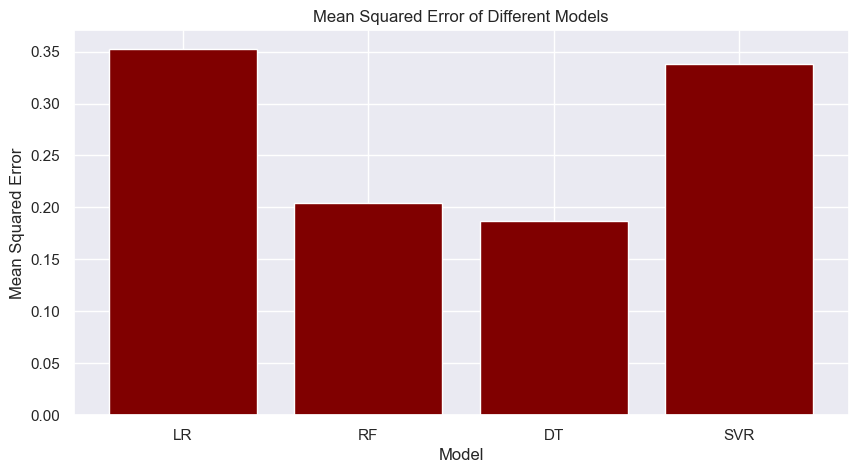

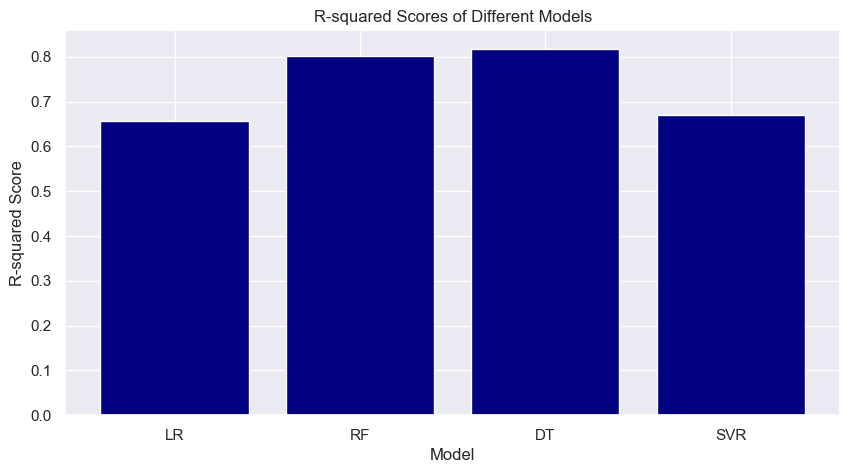

In [121]:
# Fit the pipelines and evaluate
model_names = []
mse_scores = []
r2_scores = []
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train_rfe1, y_train)
    y_pred = pipeline.predict(X_test_1)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_names.append(model_name.upper())
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    
    # Printing performance metrics
    print(f'{model_name.upper()} Model - Test Set Evaluation')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Score: {r2}')
    print('-'*30)


# Plotting Mean Squared Error
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_scores, color='maroon')
plt.title('Mean Squared Error of Different Models')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()

# Plotting R-squared Scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores, color='navy')
plt.title('R-squared Scores of Different Models')
plt.ylabel('R-squared Score')
plt.xlabel('Model')
plt.show()


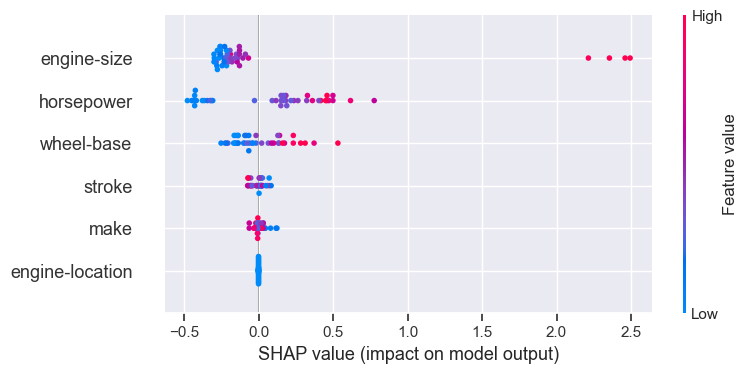

In [122]:
import shap


# Create the SHAP values
explainer = shap.Explainer(random_forest_model)
shap_values = explainer(X_test_1)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_1)


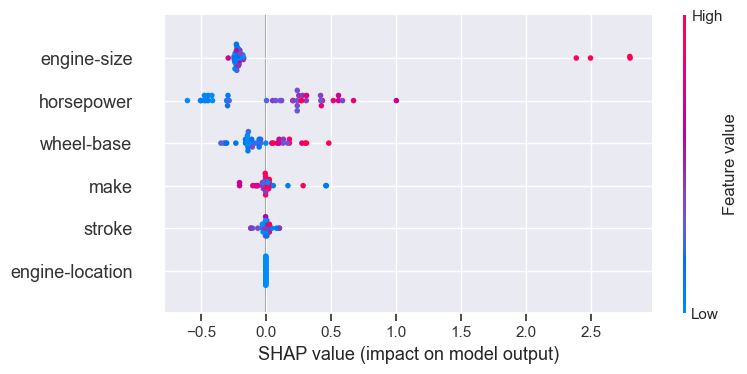

In [123]:

# Create the SHAP values
explainer = shap.Explainer(dt_regressor)
shap_values = explainer(X_test_1)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_1)